<h1><center>Premier League Relegation</center></h1>
<h2><center>Project</center></h2>

<center>March 19, 2023</center>

<center>How to get relegated: an analysis of poorly performing teams in the English Premier League</center>

## 1 Introduction

### 1.1 Research Topic

Previously in the project proposal, various football statistics have been scraped and explored from FBref to understand the patterns and behavior of relegated teams from the 1992-1993 season. General statistics like points accumulated, win rate, and goals have been analysed in the project proposal. However, advanced statistics such as expected goals have not been analysed previously as the data was missing before the 2017-2018 season. 

As an avid football fan, I was interested in using the data to feed into a machine learning model to predict football results. Regardless of how advanced and accurate machine learning has become, the beautiful game can produce unpredictable results such as Leicester City winning the league in the 2015-2016 season when they were classified as a 'weaker' team at the start of the season. However, according to Baboota and Kaur [1], their model still resulted in positive results even though their dataset is not as extensive as the major organisations, and this encourages me to carry on with this project.

Hence in the final project, we will use data available in FBref from the previous seasons to feed in the Keras model to predict which teams are likely to be relegated in the current season. The rationale behind choosing the Keras model will be elaborated further in this report. We will then analyse the advanced statistics of the predicted relegated teams and see what patterns these teams have in common with previously relegated teams, which we can then use to validate the results of the model. 

Since certain data is missing for the seasons before the 2017-2018 season, a few assumptions were made to fill in the missing data, which will be explained further in the processing portion of this project.

If we simply remove the seasons before the 2017-2018 season, the dataset available for machine learning will be too small as only 6 seasons of data would be available; therefore, feature engineering is needed to increase the dataset. 

Since the 2022-2023 season is currently ongoing, the features from the scraped data have to be scaled to a per match scale as an indicator of a team's overall performance during each game.

### 1.2 Objectives

The project objective is to analyse the results of the Keras model to narrow down the predicted relegated and classified weaker teams and analyse whether they have similar patterns to previously relegated teams.

In this project, the following will be executed:
  1. Scrape, clean and process data for machine learning and analysis
  2. Perform feature engineering to standardise the data scraped and fill in missing information
  3. Feed the cleaned data into the Keras model for prediction
  4. Analyse the performance of the teams playing in the ongoing season along with the previously relegated teams
  5. Use data visualisations and statistics to identify patterns and trends of poorly performing teams
  
### 1.3 Methods

#### 1.3.1 Gathering of Data

We will be feeding the data into the Keras model for prediction; hence, the data needs to be as extensive and complete as possible for optimal results. Data will be scraped from FBref whose data is collected from Opta which is a global leader in sports data collection, where the official premier league website gather their data from [2].

Advanced statistics like expected goals are missing before the 2017-2018 season; hence, we will gather all data available from the 1992-1993 season which is the official start of the premier league by scraping the tables available in FBref similar to the project proposal.

As an extension of the project proposal, we will then go down to a squad level and scrape the data available for the squads in each season, which we can then use to analyse individual player performance. However, scraping each team's data in each season will be time consuming and excessive as it comprises of 900 team links. With FBref's limit of 20 request per minute [7], it will take 45 minutes alone just to request the page without counting the scraping and compiling of tables. Therefore, we will only extract the previously relegated teams' data and the teams in the current season for comparison and analysis of the results of the Keras Model.

The `playing time` table and `miscellaneous statistics` table available in both the league level and squad level data have been excluded in this project as the data available are just an extension of the statistics already available in the other tables provided by FBref.

The webscraper provided in the project proposal has been improved and simplified to scrape and convert the data into a csv file and provide feedback on which tables have missing data for the previous seasons to ensure we choose the tables with full data from the 1992-1993 season onwards.

#### 1.3.2 Feature Selection

Feature selection for machine learning is a challenging task as having a large number of features would tend to cause the model to overfit and increase computational cost [4].

We could have gathered more features to increase the dimensions of the data, however that comes at a cost. It limits the data available for machine learning as advanced statistics are only availble for 7 seasons. This increases the number of features but reduces the data size. 

Feature engineering to fill in the data would be detrimental to the machine learning results as 25 out of the 32 seasons worth of data would be filled in by my own assumptions. This reduces the authenticity and accuracy of the data, which diminishes the validity of the results.

Hence, we will only select variables with full data and variables that we can make assumptions with confidence. The methodology of filling in the missing variables will be explained further in the project.

In modern football where everything is tracked, every variable available could be a defining factor in a team's overall performance, so we are selecting most of the variables available to us from FBref.

#### 1.3.3 TensorFlow Keras Model

The TensorFlow machine learning framework is chosen for this project as it allows us to use pre-built models like Keras to perform our objectives. The pre-built model is chosen to optimise and simplify our code and processing pipelines.

Since we will be using data in tables to train our model, the columns will be mapped using the Keras preprocessing layers to ensure the raw data scraped can be formatted to be utilised by the machine learning model [6] . The preprocessing layers simplify the standardisation and processing of data, ensuring clear traceablity and pipelines.

There are many premade models available on TensorFlow but there are only two models that can suit the structured data we scraped in the report - Keras and the decision forest model. Keras was chosen instead of the decision forest model as it is able to handle the high dimensionality of our data better as it uses a neural network whereas the decision tree breaks the dataset into smaller datasets and categorises them recursively according to the data. The decision tree model will not be optimal for this project as our data consists of multiple features and the population of data is not big enough, and breaking down the features part by part will cause the model to overfit [7]. Therefore, the Keras model was chosen instead.


In [1]:
## Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import math
import numpy as np
import seaborn as sns
import re
import time
import matplotlib as mpl
import unittest
import tensorflow as tf
from keras import layers

ModuleNotFoundError: No module named 'tensorflow'

## 2 Functions

### 2.1 Scrape links and convert into soup object

#### 2.1.1 Test Driven Development
First, we will create a function to scrape links and convert them into soup objects which we can then extract the tables from.

We will use test driven development to develop this function. We will test the following things:

1. Does the function exist?
2. Does the function return something?
3. Does the function return a list?
4. Does the function return a correct number of objects in the list?
5. Does the function return the correct type of values in the list?

Below is a sample set of links to scrape for testing and the unit tests:

In [3]:
TestLinks = ['https://www.google.com','https://www.google.com','https://www.google.com']

In [4]:
class ScrapeTesting(unittest.TestCase):
    # 1. function exist?
    def test_func_exist(self):
        self.assertIsNotNone(ScrapePage)
    
    # 2. function return?
    def test_func_returns(self):
        self.assertIsNotNone(ScrapePage(TestLinks))

    # 3. function returns list
    def test_func_returns_list(self):
        self.assertTrue(type(ScrapePage(TestLinks)) == list)

    # 4. function returns correct number in list
    def test_function_returns_len(self):
        self.assertEqual(len(TestLinks),len(ScrapePage(TestLinks)))

    # 5. function returns correct type 
    def test_function_returns_list_type(self):
        for soup in ScrapePage(TestLinks):
            self.assertIsInstance(soup, str)

if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

test_func_exist (__main__.ScrapeTesting) ... ERROR
test_func_returns (__main__.ScrapeTesting) ... ERROR
test_func_returns_list (__main__.ScrapeTesting) ... ERROR
test_function_returns_len (__main__.ScrapeTesting) ... ERROR
test_function_returns_list_type (__main__.ScrapeTesting) ... ERROR

ERROR: test_func_exist (__main__.ScrapeTesting)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\huang\AppData\Local\Temp\ipykernel_13612\965669908.py", line 4, in test_func_exist
    self.assertIsNotNone(ScrapePage)
NameError: name 'ScrapePage' is not defined

ERROR: test_func_returns (__main__.ScrapeTesting)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\huang\AppData\Local\Temp\ipykernel_13612\965669908.py", line 8, in test_func_returns
    self.assertIsNotNone(ScrapePage(TestLinks))
NameError: name 'ScrapePage' is not defined

ERROR: test_func_retur

From the results of the test above, we did not pass any test as the function is not created yet. Below is a basic function to pass the first test:

In [5]:
def ScrapePage():
    pass

In [6]:
class ScrapeTesting(unittest.TestCase):
    # 1. function exist?
    def test_func_exist(self):
        self.assertIsNotNone(ScrapePage)
    
    # 2. function return?
    def test_func_returns(self):
        self.assertIsNotNone(ScrapePage(TestLinks))

    # 3. function returns list
    def test_func_returns_list(self):
        self.assertTrue(type(ScrapePage(TestLinks)) == list)

    # 4. function returns correct number in list
    def test_function_returns_len(self):
        self.assertEqual(len(TestLinks),len(ScrapePage(TestLinks)))

    # 5. function returns correct type 
    def test_function_returns_list_type(self):
        for soup in ScrapePage(TestLinks):
            self.assertIsInstance(soup, str)

if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

test_func_exist (__main__.ScrapeTesting) ... ok
test_func_returns (__main__.ScrapeTesting) ... ERROR
test_func_returns_list (__main__.ScrapeTesting) ... ERROR
test_function_returns_len (__main__.ScrapeTesting) ... ERROR
test_function_returns_list_type (__main__.ScrapeTesting) ... ERROR

ERROR: test_func_returns (__main__.ScrapeTesting)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\huang\AppData\Local\Temp\ipykernel_13612\965669908.py", line 8, in test_func_returns
    self.assertIsNotNone(ScrapePage(TestLinks))
TypeError: ScrapePage() takes 0 positional arguments but 1 was given

ERROR: test_func_returns_list (__main__.ScrapeTesting)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\huang\AppData\Local\Temp\ipykernel_13612\965669908.py", line 12, in test_func_returns_list
    self.assertTrue(type(ScrapePage(TestLinks)) == list)
TypeError:

After passing the first step, we added a minimal amount of code to pass the second test:

In [7]:
def ScrapePage(TestLinks):
    return 1

In [8]:
class ScrapeTesting(unittest.TestCase):
    # 1. function exist?
    def test_func_exist(self):
        self.assertIsNotNone(ScrapePage)
    
    # 2. function return?
    def test_func_returns(self):
        self.assertIsNotNone(ScrapePage(TestLinks))

    # 3. function returns list
    def test_func_returns_list(self):
        self.assertTrue(type(ScrapePage(TestLinks)) == list)

    # 4. function returns correct number in list
    def test_function_returns_len(self):
        self.assertEqual(len(TestLinks),len(ScrapePage(TestLinks)))

    # 5. function returns correct type 
    def test_function_returns_list_type(self):
        for soup in ScrapePage(TestLinks):
            self.assertIsInstance(soup, str)

if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

test_func_exist (__main__.ScrapeTesting) ... ok
test_func_returns (__main__.ScrapeTesting) ... ok
test_func_returns_list (__main__.ScrapeTesting) ... FAIL
test_function_returns_len (__main__.ScrapeTesting) ... ERROR
test_function_returns_list_type (__main__.ScrapeTesting) ... ERROR

ERROR: test_function_returns_len (__main__.ScrapeTesting)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\huang\AppData\Local\Temp\ipykernel_13612\965669908.py", line 16, in test_function_returns_len
    self.assertEqual(len(TestLinks),len(ScrapePage(TestLinks)))
TypeError: object of type 'int' has no len()

ERROR: test_function_returns_list_type (__main__.ScrapeTesting)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\huang\AppData\Local\Temp\ipykernel_13612\965669908.py", line 20, in test_function_returns_list_type
    for soup in ScrapePage(TestLinks):
TypeE

Next we pass the third test by returning a list:

In [9]:
def ScrapePage(TestLinks):
    return []

In [10]:
class ScrapeTesting(unittest.TestCase):
    # 1. function exist?
    def test_func_exist(self):
        self.assertIsNotNone(ScrapePage)
    
    # 2. function return?
    def test_func_returns(self):
        self.assertIsNotNone(ScrapePage(TestLinks))

    # 3. function returns list
    def test_func_returns_list(self):
        self.assertTrue(type(ScrapePage(TestLinks)) == list)

    # 4. function returns correct number in list
    def test_function_returns_len(self):
        self.assertEqual(len(TestLinks),len(ScrapePage(TestLinks)))

    # 5. function returns correct type 
    def test_function_returns_list_type(self):
        self.assertNotEmpty(ScrapePage(TestLinks))
        for soup in ScrapePage(TestLinks):
            self.assertIsInstance(soup, str)

if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

test_func_exist (__main__.ScrapeTesting) ... ok
test_func_returns (__main__.ScrapeTesting) ... ok
test_func_returns_list (__main__.ScrapeTesting) ... ok
test_function_returns_len (__main__.ScrapeTesting) ... FAIL
test_function_returns_list_type (__main__.ScrapeTesting) ... ERROR

ERROR: test_function_returns_list_type (__main__.ScrapeTesting)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\huang\AppData\Local\Temp\ipykernel_13612\3058975751.py", line 20, in test_function_returns_list_type
    self.assertNotEmpty(ScrapePage(TestLinks))
AttributeError: 'ScrapeTesting' object has no attribute 'assertNotEmpty'

FAIL: test_function_returns_len (__main__.ScrapeTesting)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\huang\AppData\Local\Temp\ipykernel_13612\3058975751.py", line 16, in test_function_returns_len
    self.assertEqual(len(TestLinks)

For the fourth test, we checked whether the links input into the function is the same length as the output:

In [11]:
def ScrapePage(TestLinks):
    return [1,2,3]

In [12]:
class ScrapeTesting(unittest.TestCase):
    # 1. function exist?
    def test_func_exist(self):
        self.assertIsNotNone(ScrapePage)
    
    # 2. function return?
    def test_func_returns(self):
        self.assertIsNotNone(ScrapePage(TestLinks))
    # 3. function returns list
    def test_func_returns_list(self):
        self.assertTrue(type(ScrapePage(TestLinks)) == list)

    # 4. function returns correct number in list
    def test_function_returns_len(self):
        self.assertEqual(len(TestLinks),len(ScrapePage(TestLinks)))

    # 5. function returns correct type 
    def test_function_returns_list_type(self):
        for soup in ScrapePage(TestLinks):
            self.assertIsInstance(soup, str)

if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

test_func_exist (__main__.ScrapeTesting) ... ok
test_func_returns (__main__.ScrapeTesting) ... ok
test_func_returns_list (__main__.ScrapeTesting) ... ok
test_function_returns_len (__main__.ScrapeTesting) ... ok
test_function_returns_list_type (__main__.ScrapeTesting) ... FAIL

FAIL: test_function_returns_list_type (__main__.ScrapeTesting)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\huang\AppData\Local\Temp\ipykernel_13612\1991519769.py", line 20, in test_function_returns_list_type
    self.assertIsInstance(soup, str)
AssertionError: 1 is not an instance of <class 'str'>

----------------------------------------------------------------------
Ran 5 tests in 0.013s

FAILED (failures=1)


Then we pass the fourth test by changing each element to string elements as a soup element is essentially a string:

In [13]:
def ScrapePage(TestLinks):
    return ['1','2','3']

In [14]:
class ScrapeTesting(unittest.TestCase):
    # 1. function exist?
    def test_func_exist(self):
        self.assertIsNotNone(ScrapePage)
    
    # 2. function return?
    def test_func_returns(self):
        self.assertIsNotNone(ScrapePage(TestLinks))

    # 3. function returns list
    def test_func_returns_list(self):
        self.assertTrue(type(ScrapePage(TestLinks)) == list)

    # 4. function returns correct number in list
    def test_function_returns_len(self):
        self.assertEqual(len(TestLinks),len(ScrapePage(TestLinks)))

    # 5. function returns correct type 
    def test_function_returns_list_type(self):
        for soup in ScrapePage(TestLinks):
            self.assertIsInstance(soup, str)

if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

test_func_exist (__main__.ScrapeTesting) ... ok
test_func_returns (__main__.ScrapeTesting) ... ok
test_func_returns_list (__main__.ScrapeTesting) ... ok
test_function_returns_len (__main__.ScrapeTesting) ... ok
test_function_returns_list_type (__main__.ScrapeTesting) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.008s

OK


After passing all the tests available, we created a function to scrape FBref links. We will use the package `BeautifulSoup` to peform webscraping instead of `Scrapy` or `Selenium` as it is a simpler way to scrape information and its capabilities are sufficient for a project of this size. 

For the function below, the function takes in a list of links and appends each individual soup object from each link into a list as an output. Besides that, it will provide feedback when error codes are faced during the scraping process, by appending the links with error into a empty list (`error_link`) and successfully scraped links into `successful_links`. This feedback will notify us if any link is scraped unsuccessfully so that we can rectify the problem and also help us validate that the website is scraped successful. 

Finally, we also added in a 4 second delay between each request to keep us out of FBref's ban list.

In [15]:
def ScrapePage(links):
    #for validation of successful scraping
    error_links = []
    successful_links = []
    soups = []

    #for each link in links input
    for link in links:
        #4 second delay
        time.sleep(4)
        page = requests.get(link)

        #if status code is successful
        if page.status_code == 200:
            successful_links.append(link)
            soups.append(page.text)
        #if status code is unsuccessful

        else:
            error_links.append(link)

    #if all links not scraped
    if len(error_links) != 0 and len(successful_links) == 0:
        print("All links not been scraped due to errors")

    #if partially successful scraping
    if len(error_links) != 0 and len(successful_links) != 0:
        print(str(len(successful_links)) + " links has been scraped successfully")
        for i in error_links:
            print(i + " has an error in scraping")

    #if fully successful scraping
    else:
        print("All " + str(len(successful_links)) + " links has been scraped successfully")

    return(soups)

In [16]:
class ScrapeTesting(unittest.TestCase):
    # 1. function exist?
    def test_func_exist(self):
        self.assertIsNotNone(ScrapePage)
    
    # 2. function return?
    def test_func_returns(self):
        self.assertIsNotNone(ScrapePage(TestLinks))

    # 3. function returns list
    def test_func_returns_list(self):
        self.assertTrue(type(ScrapePage(TestLinks)) == list)

    # 4. function returns correct number in list
    def test_function_returns_len(self):
        self.assertEqual(len(TestLinks),len(ScrapePage(TestLinks)))

    # 5. function returns correct type 
    def test_function_returns_list_type(self):
        for soup in ScrapePage(TestLinks):
            self.assertIsInstance(soup, str)

if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

test_func_exist (__main__.ScrapeTesting) ... ok
test_func_returns (__main__.ScrapeTesting) ... ok
test_func_returns_list (__main__.ScrapeTesting) ... 

All 3 links has been scraped successfully


ok
test_function_returns_len (__main__.ScrapeTesting) ... 

All 3 links has been scraped successfully


ok
test_function_returns_list_type (__main__.ScrapeTesting) ... 

All 3 links has been scraped successfully
All 3 links has been scraped successfully


ok

----------------------------------------------------------------------
Ran 5 tests in 49.967s

OK


The next few functions will be used frequently throughout the project. The purpose and description of each function will be explained when they are used.

### 2.2 Scrape Tables from Soup Object

In [17]:
def ExtractTable(matched, number,soup_list):
    #List for new dataframe
    list = [] 
    counter = 0
    #for each soup in soup list
    for i in range(0,len(soup_list)):
        counter += 1

        text_to_print = "!"
        #get page identifier
        identifiers = BeautifulSoup(soup_list[i],'html.parser').find('h1').text.strip()
        season_identifier = identifiers[:9]
        if 'Stats' in identifiers:
            squad_identifier = identifiers[10:identifiers.index('Stats')-1]
        else:
            squad_identifier = ''
        #try extracted the table
        try:
            #get data table
            table = pd.read_html(soup_list[i], match = matched)[number]
        except: 
            #if table is not available stop            
            text_to_print = " (missing data for seasons <= " + season_identifier + ")"
            break

        # For tables with 1 level index
        if table.columns.nlevels == 1:
            table.dropna(how = 'all',inplace = True) #drop na rows
            table['Season'] = season_identifier
            #if squad identifier in available in table
            if 'Squad' in table.columns or 'Home' in table.columns:
                list.append(table)
            else:
                table['Squad'] = squad_identifier
                list.append(table)

        #for tables with 2 level index
        else:
            #concatenate 2 levels of column 1 into a single level
            table = table.set_axis(table.columns.map('_'.join), axis=1, copy=False)        
            table.dropna(how = 'all',inplace = True) #drop na rows
            #create season identifier column
            table['Season'] = season_identifier
            #remove front part of column 1 when unnamed
            table.columns = [c[19:] if c.startswith('Unnamed') else c for c in table.columns]
            #if squad identifier in available in table
            if 'Squad' in table.columns or 'Home' in table.columns:
                list.append(table)
            else:
                table['Squad'] = squad_identifier
                list.append(table)

        #Combine tables from season links into dataframe
        final = pd.concat(list, ignore_index  = True)

        #export to csv
        file_name = re.sub('[^a-zA-Z]+', '_', matched)
        final.to_csv(f"Datasets/{file_name}.csv", index=False)

        #read csv
        final_csv = pd.read_csv(f"Datasets/{file_name}.csv")

    #print number of tables compiles
    print(str(counter) + " tables have been compiled for " + matched + text_to_print)

    #return table
    return final_csv

### 2.3 League Level Check Missing Data

In [18]:
def CheckMissing(df):
    df1 = df.isna().groupby(df.Season).sum()
    df1 = df1.loc[(df1 !=0).any(axis=1)]
    missing = df1[df1.columns[(df1 != 0).any()]]
    not_missing = df1[df1.columns[(df1 == 0).all()]]
    for i in missing:
        missing_seasons = []
        final = []
        list_of_seasons = missing[missing[i] != 0].index.tolist()
        if len(list_of_seasons) == 1:
            missing_seasons.append(list_of_seasons[0])
            copy_missing_seasons = missing_seasons.copy()

        else:
            for j in range(0,len(list_of_seasons)-1):
                if int((list_of_seasons[j])[-4:]) == int((list_of_seasons[j+1])[-4:])-1:
                    missing_seasons.append("<= " + str(list_of_seasons[j+1]))
            copy_missing_seasons = missing_seasons.copy()
            for k in range(0,len(missing_seasons)-1):
                if int((missing_seasons[k])[-4:]) == int((missing_seasons[k+1])[-4:])-1:
                    copy_missing_seasons.pop(0)
                    
        print(i,"has missing values for seasons",''.join(copy_missing_seasons))
    print('Metrics with full data:',' , '.join(not_missing.columns.to_list()))

### 2.4 Squad Level Data Cleaning and Checking Missing Data

In [19]:
def ProcessSquad(df):
    #Removes Matches Columns
    columns_drop = ['_Matches','MP']
    for col in columns_drop:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)
    #filter out squad and opponent total
    filtered_df = df[~df['Player'].isin(['Squad Total', 'Opponent Total'])]
    #Check which column has fully null values
    filtered_df = filtered_df[filtered_df['Season'].isin(['2017-2018','2018-2019','2019-2020','2020-2021','2021-2022','2022-2023'])]
    #clean columns
    filtered_df['Nation'] = filtered_df['Nation'].apply(lambda x: str(x)[3:])
    filtered_df['Age'] = filtered_df['Age'].apply(lambda x: str(x)[:2])
    filtered_df['Pos'] = filtered_df['Pos'].apply(lambda x: str(x)[:2])
    list_of_columns = []
    for col in filtered_df.columns:
        if filtered_df[col].isnull().all():
            print(col + "is completely empty")
        else:
            list_of_columns.append(col)
    print(list_of_columns,"has full data")
    return filtered_df

### 2.5 Convert to Per Match Scale

In [20]:
def PerMatch(list_of_variables, table, mp):
    for i in list_of_variables:
        table[i] = table[i]/table[mp]
    table.drop(columns = [mp],inplace = True)
    return table

### 2.6 Pairgrid

In [21]:
def PlotPG(table):
    table = table.sort_values('Identifier', ascending = False)
    if len(table['Identifier'].unique()) == 12:
        markers = ["o", "s", "v", "D","o", "s", "v", "D","o", "s", "v", "D"]
        colours = ['grey','grey','grey','grey','green','green','green','green','red','red','red','red']
    else:
        markers = ["s","s","s"]
        colours = ["grey","green","red"]
    pg = sns.PairGrid(table, hue='Identifier', hue_kws={'marker': markers, 'color': colours})
    pg.map_offdiag(lambda x, y, **kwargs: sns.scatterplot(x=x, y=y, **kwargs), alpha=0.4, s=50)
    pg.map_diag(sns.histplot,palette = colours,multiple = "stack")
    pg.add_legend(title = 'Relegation Type')

## 3 Web Scraping

To start our project, we will scrape the data needed for our project from FBref. We will use the following functions defined in `2. Functions`:

- `ScrapePage`, which takes a list of links to scrape and returns a corresponding list of soup objects
- `ExtractTable`, which requires the table name and list of soup objects and extracts the table from each of the soup objects and compiles them into a pandas dataframe. It is capable of handling the different formatting of tables given by FBref and add in Season and Squad identifiers whenever the raw table extracted does not have them. It also provides feedback when the table is missing in a certain soup object and stops the compilation.

We will be extracting league level data for machine learning purposes and the squad level data for analysis.

### 3.1 League Level Data from Multiple Seasons

#### 3.1.1 Getting season URLs

The URLs for league level data for each season is embedded within the variable `season_url` which is provided in the code block below. We first scrape the table with the links embedded in them and then extract the links for each individual season we will be analysing.

In [22]:
seasons_url = ['https://fbref.com/en/comps/9/history/Premier-League-Seasons'] #Link of Site
seasons_soup = []
#get HTML
seasons_soup = ScrapePage(seasons_url)

seasons_year = BeautifulSoup(seasons_soup[0],'html.parser').find_all('a',text = ('Premier League','FA Premier League')) #filter to portion with Premier league and FA premier League
links = []
#get link of each season's league level data
for link in seasons_year:
    l = link.get('href')
    full_link = 'https://fbref.com' + l
    links.append(full_link)
links = sorted(list(set(links)), reverse = True)
print(links)

All 1 links has been scraped successfully
['https://fbref.com/en/comps/9/Premier-League-Stats', 'https://fbref.com/en/comps/9/2021-2022/2021-2022-Premier-League-Stats', 'https://fbref.com/en/comps/9/2020-2021/2020-2021-Premier-League-Stats', 'https://fbref.com/en/comps/9/2019-2020/2019-2020-Premier-League-Stats', 'https://fbref.com/en/comps/9/2018-2019/2018-2019-Premier-League-Stats', 'https://fbref.com/en/comps/9/2017-2018/2017-2018-Premier-League-Stats', 'https://fbref.com/en/comps/9/2016-2017/2016-2017-Premier-League-Stats', 'https://fbref.com/en/comps/9/2015-2016/2015-2016-Premier-League-Stats', 'https://fbref.com/en/comps/9/2014-2015/2014-2015-Premier-League-Stats', 'https://fbref.com/en/comps/9/2013-2014/2013-2014-Premier-League-Stats', 'https://fbref.com/en/comps/9/2012-2013/2012-2013-Premier-League-Stats', 'https://fbref.com/en/comps/9/2011-2012/2011-2012-Premier-League-Stats', 'https://fbref.com/en/comps/9/2010-2011/2010-2011-Premier-League-Stats', 'https://fbref.com/en/comps/

#### 3.1.2 Scraping tables within URLs

The output from the previous code chunk shows that all the links we need are extracted, we then utilised the `ScrapePage` function again on those links to extract the soup object for each season.

In [23]:
soups = ScrapePage(links)

All 31 links has been scraped successfully


After scraping those links and converting them into soup objects, we used the `ExtractTable` function to compile the tables we need into their own variable for further processing later in the report.

In [24]:
standings_table = ExtractTable('Regular season',0,soups) 
home_away_table = ExtractTable('Regular season Table',1,soups) 
squad_stats = ExtractTable('Squad Standard Stats',0,soups)
squad_adv_gk_stats = ExtractTable('Squad Advanced Goalkeeping',0,soups) 
squad_adv_gk_stats = ExtractTable('Squad Defensive Actions',0,soups) 
squad_adv_shoot_stats = ExtractTable('Squad Goal and Shot Creation',0,soups) 
squad_adv_pass_stats = ExtractTable('Squad Pass Types', 0,soups) 
squad_pass_stats = ExtractTable('Squad Passing', 0,soups) 
squad_playing_stats = ExtractTable('Squad Playing Time', 0,soups)
squad_poss_stats = ExtractTable('Squad Possession', 0,soups)
squad_gk_stats = ExtractTable('Squad Goalkeeping', 0,soups) 
squad_shoot_stats = ExtractTable('Squad Shooting', 0,soups) 

31 tables have been compiled for Regular season!
31 tables have been compiled for Regular season Table!
31 tables have been compiled for Squad Standard Stats!
7 tables have been compiled for Squad Advanced Goalkeeping (missing data for seasons <= 2016-2017)
7 tables have been compiled for Squad Defensive Actions (missing data for seasons <= 2016-2017)
7 tables have been compiled for Squad Goal and Shot Creation (missing data for seasons <= 2016-2017)
7 tables have been compiled for Squad Pass Types (missing data for seasons <= 2016-2017)
7 tables have been compiled for Squad Passing (missing data for seasons <= 2016-2017)
31 tables have been compiled for Squad Playing Time!
7 tables have been compiled for Squad Possession (missing data for seasons <= 2016-2017)
31 tables have been compiled for Squad Goalkeeping!
31 tables have been compiled for Squad Shooting!


From the output from the previous code chunk, it seems that only the Regular Season Tables, Standard Statistics, Squad Playing Time, Squad Goalkeeping and Squad Shooting tables have full data. We will only be using those in our machine learning training data as it has full data from the 1992-1993 season onwards.

### 3.2 Scraping Squad Level Data

#### 3.2.1 Getting season URLs

Now we will scrape the squad level data. We will be scraping data from the relegated teams of the past and the teams playing in the current season. The code chunk below goes through the soup objects of the past seasons and extracts the standings table where the team links are embedded in. 

We then filter to the rows where there is a relegation indicator and extract the `HREF` element where the link is embedded in and append them to empty list, `r_links`. We have then extracted the links of the relegated teams from the 1992-1993 season.

In [25]:
#Get list of relegated links
r_links = [] #Create empty list to append list
for i in range(1,len(soups)): #go through season soups without current season 
    r_soup = BeautifulSoup(soups[i], 'html.parser') #convert elements to soup
    standings_html = r_soup.select('table.stats_table')[0]  #select standings table
    standings_tr = standings_html.find_all('tr') # find    rows in table
    for tr in standings_tr: #for each row
        relegated = tr.find_all('th',{'class':'right relegate qualification_indicator'}) #find relegated
        if relegated != []: #if row is relegated
            relegated_html = BeautifulSoup(str(tr), 'html.parser') #change row to soup again
            relegated_a = relegated_html.find('a') #find a because href element is with a element   
            relegated_links = relegated_a.get('href') 
            r_full_link = 'https://fbref.com' + relegated_links
            r_links.append(r_full_link)

r_links = sorted(list(set(r_links)), key = lambda x: x.split('/')[-2], reverse = True)
print(r_links)

['https://fbref.com/en/squads/943e8050/2021-2022/Burnley-Stats', 'https://fbref.com/en/squads/2abfe087/2021-2022/Watford-Stats', 'https://fbref.com/en/squads/1c781004/2021-2022/Norwich-City-Stats', 'https://fbref.com/en/squads/fd962109/2020-2021/Fulham-Stats', 'https://fbref.com/en/squads/1df6b87e/2020-2021/Sheffield-United-Stats', 'https://fbref.com/en/squads/60c6b05f/2020-2021/West-Bromwich-Albion-Stats', 'https://fbref.com/en/squads/4ba7cbea/2019-2020/Bournemouth-Stats', 'https://fbref.com/en/squads/1c781004/2019-2020/Norwich-City-Stats', 'https://fbref.com/en/squads/2abfe087/2019-2020/Watford-Stats', 'https://fbref.com/en/squads/75fae011/2018-2019/Cardiff-City-Stats', 'https://fbref.com/en/squads/fd962109/2018-2019/Fulham-Stats', 'https://fbref.com/en/squads/f5922ca5/2018-2019/Huddersfield-Town-Stats', 'https://fbref.com/en/squads/60c6b05f/2017-2018/West-Bromwich-Albion-Stats', 'https://fbref.com/en/squads/17892952/2017-2018/Stoke-City-Stats', 'https://fbref.com/en/squads/fb10988f/

Next, we will extract the team links from the current season by repeating the same step as above but only with the current season's soup object.

In [26]:
current_soup = BeautifulSoup(soups[0], 'html.parser')
current_standings_html = current_soup.select('table.stats_table')[0]
current_standings_td = current_standings_html.find_all('td',{'data-stat':'team'})
current_standings_links = []
for row in current_standings_td:                                                                                                                                                                                        
    link = row.find('a').get('href')
    full_link = 'https://fbref.com' +  link
    current_standings_links.append(full_link)

print(current_standings_links)


['https://fbref.com/en/squads/18bb7c10/Arsenal-Stats', 'https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats', 'https://fbref.com/en/squads/19538871/Manchester-United-Stats', 'https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats', 'https://fbref.com/en/squads/b2b47a98/Newcastle-United-Stats', 'https://fbref.com/en/squads/822bd0ba/Liverpool-Stats', 'https://fbref.com/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats', 'https://fbref.com/en/squads/cd051869/Brentford-Stats', 'https://fbref.com/en/squads/fd962109/Fulham-Stats', 'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats', 'https://fbref.com/en/squads/8602292d/Aston-Villa-Stats', 'https://fbref.com/en/squads/47c64c55/Crystal-Palace-Stats', 'https://fbref.com/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats', 'https://fbref.com/en/squads/5bfb9659/Leeds-United-Stats', 'https://fbref.com/en/squads/d3fd31cc/Everton-Stats', 'https://fbref.com/en/squads/e4a775cb/Nottingham-Forest-Stats', 'https://fbref.com/en/squads/a2d435b

#### 3.2.2 Scraping tables within URLs

We then combine both lists of links for scraping using the `ScrapePage` function, scraping a total of 108 links with their soup objects in `squad_soups`.

In [27]:
squad_links = current_standings_links + r_links
squad_soups = ScrapePage(squad_links)

All 108 links has been scraped successfully


In [28]:

r_squad_standard = ExtractTable('Standard Stats',0,squad_soups)
r_squad_gk = ExtractTable('Goalkeeping',0,squad_soups)
r_squad_adv_gk = ExtractTable('Advanced Goalkeeping',0,squad_soups)
r_squad_shoot = ExtractTable('Shooting',0,squad_soups)                  
r_squad_pass = ExtractTable('Passing',0,squad_soups)
r_squad_pass_type = ExtractTable('Pass Types',0,squad_soups)
r_squad_goal = ExtractTable('Goal and Shot Creation',0,squad_soups)
r_squad_def = ExtractTable('Defensive Actions',0,squad_soups)
r_squad_poss = ExtractTable('Possession',0,squad_soups)

108 tables have been compiled for Standard Stats!
108 tables have been compiled for Goalkeeping!
36 tables have been compiled for Advanced Goalkeeping (missing data for seasons <= 2016-2017)
108 tables have been compiled for Shooting!
36 tables have been compiled for Passing (missing data for seasons <= 2016-2017)
36 tables have been compiled for Pass Types (missing data for seasons <= 2016-2017)
36 tables have been compiled for Goal and Shot Creation (missing data for seasons <= 2016-2017)
36 tables have been compiled for Defensive Actions (missing data for seasons <= 2016-2017)
36 tables have been compiled for Possession (missing data for seasons <= 2016-2017)


From the output above, it seems like most data is unavailable for seasons before the 2017-2018 season; this means we will need to remove the seasons before for tables with full data. It will not affect the final analysis as the tables already consist of many data points as it has statistics for each player within each squad for the seasons available.

The Playing Time and Miscellaneous Statistics table have not been extracted as it has similar variables as the other tables extracted.

### 3.3 Scraping Fixture Data

#### 3.3.1 Getting season URLs

For the final webscraping process, we will scrape the fixture data for each season. We will first extract the links of the fixtures from each season's soup object and append them to a list `fixtures_links`.

In [29]:
fixtures_links = []
for i in range(0,len(soups)):
    #convert HTML to soup object
    soup = BeautifulSoup(soups[i],'html.parser')
    #find tag where Scores & Fixtures link is embedded
    soup_href = soup.find('a',text = 'Scores & Fixtures')
    #gets the HREF link
    link = soup_href.get('href')
    full_link = 'https://fbref.com' + link
    fixtures_links.append(full_link)

fixtures_links = sorted(list(set(fixtures_links)), reverse = True)
print(fixtures_links)

['https://fbref.com/en/comps/9/schedule/Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2021-2022/schedule/2021-2022-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2018-2019/schedule/2018-2019-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2017-2018/schedule/2017-2018-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2016-2017/schedule/2016-2017-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2015-2016/schedule/2015-2016-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2014-2015/schedule/2014-2015-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2013-2014/schedule/2013-2014-Premier-League-Scores-and-Fixtures', 'https://fbref.com/en/comps/9/2012-2013/schedule/2012-2013-

#### 3.3.2 Scraping tables within URLs

We then feed those links into the `ScrapePage` function for webscraping.

In [30]:
fixtures_soups = ScrapePage(fixtures_links)

All 31 links has been scraped successfully


The `ExtractTable` function is utilised to compile each season's fixtures into a consolidated pandas dataframe under the name `fixtures_table`.

In [31]:
fixtures_table = ExtractTable('Scores & Fixtures',0,fixtures_soups)

31 tables have been compiled for Scores & Fixtures!


## 4 Cleaning & Processing

### 4.1 Function to add in identifiers

Next, we proceed to the cleaning and processing of the data extracted. In the code chunk below, we create a function, `standing_type` to create a column in the dataframes we are going process to identify which teams are relegated and which teams are not. We use the `Notes` column in Regular Standings Table extracted as the identifiers by joining the table with the dataframe we are processing. We will need to rename the `Squad` column of the table we are processing as the Regular Standings Table have abbreviated squad names for certain teams, and if we do not rename them, some squads will not be identified.

In [32]:
#Squads to rename
rename_squad_list = {'Manchester United' : 'Manchester Utd', 
                     'Tottenham Hotspur' : 'Tottenham',
                     'Newcastle United' : 'Newcastle Utd',
                     'Brighton & Hove Albion' : 'Brighton',
                     'Nottingham Forest' : "Nott'ham Forest",
                     'Wolverhampton Wanderers' : 'Wolves',
                     'West Ham United' : 'West Ham',
                     'Sheffield United' : 'Sheffield Utd',
                     'West Bromwich Albion':'West Brom',
                     'Huddersfield Town' : 'Huddersfield'}

#Create new column standing type
standings_table['Standing Type'] = np.where(standings_table['Notes'] == 'Relegated' ,1, 0)

#Table to join
rankings = standings_table[['Season','Squad','Standing Type']]

#function to create new column to fill NA values in `Notes` Column
def standing_type(table):
    table['Squad'] = table['Squad'].replace(rename_squad_list)
    standing_table = table.merge(rankings, how = 'left', on = ['Season','Squad'])
    return standing_table

### 4.2 Squad Level Data

We will first be cleaning and processing the squad level data extracted for analysis.

#### 4.2.1 Standard Statistics

We will be using the `standing_type` function at the start of each processing step and the `ProcessSquad` function for the squad level data. `ProcessSquad` removes the unnecessary rows like `Squad Total` and `Opponent Total` and filters the data frame to the seasons after the 2017-2018 season. As explained in the introduction, we filter to those seasons as it has the full data for most of the advanced statistics. `ProcessSquad` also provides feedback in the identification of fully empty columns and which column has full data.

In [33]:
r_squad_standard_2 = standing_type(ProcessSquad(r_squad_standard))

['Player', 'Nation', 'Pos', 'Age', 'Playing Time_Starts', 'Playing Time_Min', 'Playing Time_90s', 'Performance_Gls', 'Performance_Ast', 'Performance_G+A', 'Performance_G-PK', 'Performance_PK', 'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR', 'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG', 'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A', 'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG', 'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG', 'Per 90 Minutes_npxG+xAG', 'Season', 'Squad', 'Playing Time_MP'] has full data


Now we check which column has `NA` values:

In [34]:
r_squad_standard_2.columns[r_squad_standard_2.isna().any()].tolist()

['Playing Time_Min',
 'Playing Time_90s',
 'Performance_Gls',
 'Performance_Ast',
 'Performance_G+A',
 'Performance_G-PK',
 'Performance_PK',
 'Performance_PKatt',
 'Performance_CrdY',
 'Performance_CrdR',
 'Expected_xG',
 'Expected_npxG',
 'Expected_xAG',
 'Expected_npxG+xAG',
 'Progression_PrgC',
 'Progression_PrgP',
 'Progression_PrgR',
 'Per 90 Minutes_Gls',
 'Per 90 Minutes_Ast',
 'Per 90 Minutes_G+A',
 'Per 90 Minutes_G-PK',
 'Per 90 Minutes_G+A-PK',
 'Per 90 Minutes_xG',
 'Per 90 Minutes_xAG',
 'Per 90 Minutes_xG+xAG',
 'Per 90 Minutes_npxG',
 'Per 90 Minutes_npxG+xAG',
 'Playing Time_MP']

First we assume that those that have 0 or `NA` matches played have `NA` values so we filter out those players. 

In [38]:
#replace null valies for playing Time = 0
r_squad_standard_2 = r_squad_standard_2.query('`Playing Time_MP`.notna()  and `Playing Time_MP` != 0' )
r_squad_standard_2.columns[r_squad_standard_2.isna().any()].tolist()

[]

The output above depicts that there are no more missing values in the dataset. We can then drop the variables that are a different calculation of the same statistic, for example `Performance_Gls` and `Per 90 Minutes_Gls`. Comparitively speaking, `Per 90 Minutes_Gls` is a better statistic to utilise than `Performance_Gls` as it depicts the number of goals at the end of the season, but the current season is not over yet, making the former a fairer statistic to analyse the behaviour of teams. 

We then filtered based on the number of matches that each player competed in, only including those who played more than 19 matches as that is the halfway mark of the total number of games per season. Arbritrarily including those who played more than 19 games will allow us to analyse the more consistently selected players as an accurate gauge of the team's performance. This is imperative as certain players only competed in one match in the season, therefore scaling the analysis as having a higher percentage of all statistics when in reality it is inaccurate. 

We then used the `PerMatch` function to derive certain statistics per game instead of the statistics garnered over the whole season. 

These few steps are repeated throughout processing squad-level data.

In [39]:
r_squad_standard_3 = r_squad_standard_2.drop(columns = ['Playing Time_Starts',
       'Playing Time_Min', 'Performance_Gls',
       'Performance_Ast', 'Performance_G+A', 'Performance_G-PK',
       'Performance_PK', 'Performance_PKatt','Expected_xG', 'Expected_npxG', 'Expected_xAG',
       'Expected_npxG+xAG'])

r_squad_standard_3 = r_squad_standard_3.query('`Playing Time_MP` >= 19')

list_to_change = ['Performance_CrdY','Performance_CrdR','Progression_PrgC','Progression_PrgP','Progression_PrgR']

squad_standard_df = PerMatch(list_to_change,r_squad_standard_3,'Playing Time_MP')


The table below depicts an example of the processed squad-standard statistics.

In [40]:
squad_standard_df.head()

Player Nation Pos Age  Playing Time_90s  Performance_CrdY  \
33          Ederson    BRA  GK  29              27.0          0.074074   
34            Rodri    ESP  MF  26              24.9          0.115385   
35   Erling Haaland    NOR  FW  22              23.5          0.153846   
36  Kevin De Bruyne    BEL  MF  31              21.5          0.040000   
37   Bernardo Silva    POR  MF  28              19.8          0.120000   

    Performance_CrdR  Progression_PrgC  Progression_PrgP  Progression_PrgR  \
33               0.0          0.000000          0.000000          0.000000   
34               0.0          2.500000          8.230769          1.307692   
35               0.0          0.846154          1.576923          4.500000   
36               0.0          3.560000          7.520000          7.560000   
37               0.0          2.960000          4.000000          6.280000   

    ...  Per 90 Minutes_G-PK  Per 90 Minutes_G+A-PK  Per 90 Minutes_xG  \
33  ...                 0.00                   0.04               0.00   
34  ...                 0.08                   0.28               0.16   
35  ...                 0.98                   1.19               0.86   
36  ...                 0.19                   0.74               0.19   
37  ...                 0.20                   0.45               0.08   

    Per 90 Minutes_xAG  Per 90 Minutes_xG+xAG  Per 90 Minutes_npxG  \
33                0.01                   0.01                 0.00   
34                0.16                   0.32                 0.16   
35                0.16                   1.02                 0.69   
36                0.48                   0.67                 0.19   
37                0.14                   0.22                 0.08   

    Per 90 Minutes_npxG+xAG     Season            Squad  Standing Type  
33                     0.01  2022-2023  Manchester City              0  
34                     0.32  2022-2023  Manchester City              0  
35                     0.85  2022-2023  Manchester City              0  
36                     0.67  2022-2023  Manchester City              0  
37                     0.22  2022-2023  Manchester City              0  

[5 rows x 23 columns]

#### 4.2.2 Goalkeeping

#### 4.2.2.1 Standard Goalkeeping

We continued processing the data to generate standard goalkeeping statistics by using the `standing_type` and `ProcessSquad` functions.

In [41]:
r_squad_gk_2 = standing_type(ProcessSquad(r_squad_gk))


['Player', 'Nation', 'Pos', 'Age', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min', 'Playing Time_90s', 'Performance_GA', 'Performance_GA90', 'Performance_SoTA', 'Performance_Saves', 'Performance_Save%', 'Performance_W', 'Performance_D', 'Performance_L', 'Performance_CS', 'Performance_CS%', 'Penalty Kicks_PKatt', 'Penalty Kicks_PKA', 'Penalty Kicks_PKsv', 'Penalty Kicks_PKm', 'Penalty Kicks_Save%', 'Season', 'Squad'] has full data


The code chunk below filters out rows with missing values and it appears that the goalkeepers without penalty kicks taken against them have missing values in `Penalty Kicks_Save%`. 

In [42]:
r_squad_gk_2[r_squad_gk_2.isna().any(axis=1)].head()

Player Nation Pos Age  Playing Time_MP  Playing Time_Starts  \
6     Martin Dúbravka    SVK  GK  34              1.0                  0.0   
9        Jason Steele    ENG  GK  32              3.0                  3.0   
12        Marek Rodák    SVK  GK  26              2.0                  2.0   
13  Kepa Arrizabalaga    ESP  GK  28             19.0                 19.0   
14      Edouard Mendy    SEN  GK  31              9.0                  8.0   

    Playing Time_Min  Playing Time_90s  Performance_GA  Performance_GA90  ...  \
6               67.0               0.7             0.0              0.00  ...   
9              270.0               3.0             2.0              0.67  ...   
12             180.0               2.0             2.0              1.00  ...   
13            1665.0              18.5            16.0              0.86  ...   
14             765.0               8.5            12.0              1.41  ...   

    Performance_CS  Performance_CS%  Penalty Kicks_PKatt  Penalty Kicks_PKA  \
6              0.0              NaN                  0.0                0.0   
9              2.0             66.7                  0.0                0.0   
12             1.0             50.0                  0.0                0.0   
13             8.0             42.1                  0.0                0.0   
14             1.0             12.5                  0.0                0.0   

    Penalty Kicks_PKsv  Penalty Kicks_PKm  Penalty Kicks_Save%     Season  \
6                  0.0                0.0                  NaN  2022-2023   
9                  0.0                0.0                  NaN  2022-2023   
12                 0.0                0.0                  NaN  2022-2023   
13                 0.0                0.0                  NaN  2022-2023   
14                 0.0                0.0                  NaN  2022-2023   

            Squad  Standing Type  
6   Newcastle Utd              0  
9        Brighton              0  
12         Fulham              0  
13        Chelsea              0  
14        Chelsea              0  

[5 rows x 26 columns]

We then filled those values with '0' and filtered the dataset to only include goalkeepers who played more than 19 matches, as aforementioned.

In [43]:
r_squad_gk_2.loc[r_squad_gk_2['Penalty Kicks_PKatt'] == 0, r_squad_gk_2.isna().any()] = r_squad_gk_2.loc[r_squad_gk_2['Penalty Kicks_PKatt'] == 0, r_squad_gk_2.isna().any()].fillna(0)
r_squad_gk_2 = r_squad_gk_2.query('`Playing Time_MP` >= 19')

The table below shows that there are no more missing values within the dataset.

In [44]:
r_squad_gk_2[r_squad_gk_2.isna().any(axis=1)].head()

Empty DataFrame
Columns: [Player, Nation, Pos, Age, Playing Time_MP, Playing Time_Starts, Playing Time_Min, Playing Time_90s, Performance_GA, Performance_GA90, Performance_SoTA, Performance_Saves, Performance_Save%, Performance_W, Performance_D, Performance_L, Performance_CS, Performance_CS%, Penalty Kicks_PKatt, Penalty Kicks_PKA, Penalty Kicks_PKsv, Penalty Kicks_PKm, Penalty Kicks_Save%, Season, Squad, Standing Type]
Index: []

[0 rows x 26 columns]

#### 4.2.2.2 Advanced Goalkeeping

The steps mentioned above were repeated to gather advanced goalkeeping statistics.

In [45]:
r_squad_adv_gk_2 = standing_type(ProcessSquad(r_squad_adv_gk))

['Player', 'Nation', 'Pos', 'Age', '90s', 'Goals_GA', 'Goals_PKA', 'Goals_FK', 'Goals_CK', 'Goals_OG', 'Expected_PSxG', 'Expected_PSxG/SoT', 'Expected_PSxG+/-', 'Expected_/90', 'Launched_Cmp', 'Launched_Att', 'Launched_Cmp%', 'Passes_Att', 'Passes_Thr', 'Passes_Launch%', 'Passes_AvgLen', 'Goal Kicks_Att', 'Goal Kicks_Launch%', 'Goal Kicks_AvgLen', 'Crosses_Opp', 'Crosses_Stp', 'Crosses_Stp%', 'Sweeper_#OPA', 'Sweeper_#OPA/90', 'Sweeper_AvgDist', 'Season', 'Squad'] has full data


In [46]:
r_squad_adv_gk_2 = r_squad_adv_gk_2.query('`90s` >= 19')
r_squad_adv_gk_2[r_squad_adv_gk_2.isna().any(axis=1)].head()

Empty DataFrame
Columns: [Player, Nation, Pos, Age, 90s, Goals_GA, Goals_PKA, Goals_FK, Goals_CK, Goals_OG, Expected_PSxG, Expected_PSxG/SoT, Expected_PSxG+/-, Expected_/90, Launched_Cmp, Launched_Att, Launched_Cmp%, Passes_Att, Passes_Thr, Passes_Launch%, Passes_AvgLen, Goal Kicks_Att, Goal Kicks_Launch%, Goal Kicks_AvgLen, Crosses_Opp, Crosses_Stp, Crosses_Stp%, Sweeper_#OPA, Sweeper_#OPA/90, Sweeper_AvgDist, Season, Squad, Standing Type]
Index: []

[0 rows x 33 columns]

#### 4.2.2.3 Processing

This step was taken to join `Standard Goalkeeping` and `Advanced Goalkeeping` statistics, and the table below shows that there are no missing data.

In [47]:
r_squad_gk_3 = r_squad_gk_2.merge(r_squad_adv_gk_2, how="left")
r_squad_gk_3[r_squad_gk_3.isna().any(axis=1)].head()

Player Nation Pos Age  Playing Time_MP  Playing Time_Starts  \
9  Kepa Arrizabalaga    ESP  GK  28             19.0                 19.0   

   Playing Time_Min  Playing Time_90s  Performance_GA  Performance_GA90  ...  \
9            1665.0              18.5            16.0              0.86  ...   

   Passes_AvgLen  Goal Kicks_Att  Goal Kicks_Launch%  Goal Kicks_AvgLen  \
9            NaN             NaN                 NaN                NaN   

   Crosses_Opp  Crosses_Stp  Crosses_Stp%  Sweeper_#OPA  Sweeper_#OPA/90  \
9          NaN          NaN           NaN           NaN              NaN   

   Sweeper_AvgDist  
9              NaN  

[1 rows x 52 columns]

All statistics that had similar variables (i.e., per 90 mins and per season) were filtered to include only the statistics per match instead of per season. We also dropped the variables that were duplicated from the squad-standard dataset.

The table below proves that there were no missing data.

In [48]:
r_squad_gk_4 = r_squad_gk_3.drop(columns = ['Playing Time_Starts','Playing Time_Min','Performance_GA','Performance_W','Performance_D','Performance_L','Performance_CS%','Penalty Kicks_PKA','Penalty Kicks_PKsv','Penalty Kicks_PKm','90s','Goals_GA','Expected_PSxG+/-','Launched_Cmp%','Passes_Launch%','Goal Kicks_Launch%','Crosses_Stp%','Sweeper_#OPA'])

list_of_gk_stats = ['Performance_SoTA','Performance_Saves','Performance_CS','Penalty Kicks_PKatt','Goals_PKA','Goals_FK','Goals_CK','Goals_OG','Expected_PSxG','Passes_Att','Passes_Thr','Launched_Cmp','Launched_Att','Goal Kicks_Att','Crosses_Opp','Crosses_Stp']
r_squad_gk_df = PerMatch(list_of_gk_stats, r_squad_gk_4, 'Playing Time_90s')
r_squad_gk_df[r_squad_gk_df.isna().any(axis=1)].head()

Player Nation Pos Age  Playing Time_MP  Performance_GA90  \
9  Kepa Arrizabalaga    ESP  GK  28             19.0              0.86   

   Performance_SoTA  Performance_Saves  Performance_Save%  Performance_CS  \
9          3.891892           3.135135               77.8        0.432432   

   ...  Launched_Att  Passes_Att Passes_Thr Passes_AvgLen  Goal Kicks_Att  \
9  ...           NaN         NaN        NaN           NaN             NaN   

   Goal Kicks_AvgLen  Crosses_Opp  Crosses_Stp  Sweeper_#OPA/90  \
9                NaN          NaN          NaN              NaN   

   Sweeper_AvgDist  
9              NaN  

[1 rows x 33 columns]

In [49]:
r_squad_gk_df.head()

Player Nation Pos Age  Playing Time_MP  Performance_GA90  \
0  Aaron Ramsdale    ENG  GK  24             27.0              0.93   
1         Ederson    BRA  GK  29             27.0              0.93   
2    David de Gea    ESP  GK  32             26.0              1.35   
3     Hugo Lloris    FRA  GK  36             21.0              1.38   
4       Nick Pope    ENG  GK  30             26.0              0.75   

   Performance_SoTA  Performance_Saves  Performance_Save%  Performance_CS  \
0          3.148148           2.259259               72.9        0.444444   
1          2.222222           1.333333               63.3        0.370370   
2          4.000000           2.692308               67.3        0.423077   
3          4.523810           3.190476               70.5        0.333333   
4          3.134921           2.380952               77.2        0.476190   

   ...  Launched_Att  Passes_Att Passes_Thr Passes_AvgLen  Goal Kicks_Att  \
0  ...     10.851852   24.555556   5.000000          33.3        3.740741   
1  ...      7.259259   30.518519   4.259259          28.0        4.444444   
2  ...     11.423077   26.500000   3.615385          31.6        4.461538   
3  ...      8.523810   21.857143   4.476190          31.3        7.761905   
4  ...     10.714286   19.960317   6.626984          33.0        5.714286   

   Goal Kicks_AvgLen  Crosses_Opp  Crosses_Stp  Sweeper_#OPA/90  \
0               49.1    10.370370     0.555556             1.26   
1               32.8     8.074074     0.703704             1.19   
2               48.9    14.500000     0.423077             0.81   
3               24.9    13.047619     0.761905             1.24   
4               51.9    12.619048     0.912698             2.06   

   Sweeper_AvgDist  
0             16.7  
1             16.2  
2             14.7  
3             14.1  
4             18.8  

[5 rows x 33 columns]

### 4.2.3 Passing

#### 4.2.3.1 Standard Passing

The steps were repeated to get standard passing data.

In [50]:
r_squad_pass_2 = standing_type(ProcessSquad(r_squad_pass))

['Player', 'Nation', 'Pos', 'Age', '90s', 'Total_Cmp', 'Total_Att', 'Total_Cmp%', 'Total_TotDist', 'Total_PrgDist', 'Short_Cmp', 'Short_Att', 'Short_Cmp%', 'Medium_Cmp', 'Medium_Att', 'Medium_Cmp%', 'Long_Cmp', 'Long_Att', 'Long_Cmp%', '_Ast', '_xAG', '_xA', '_A-xAG', '_KP', '_1/3', '_PPA', '_CrsPA', '_PrgP', 'Season', 'Squad'] has full data


The code below shows that there are missing data within the variables with `Cmp%`. This is understandable as it is not possible to get a numbered value for the players who did not make a pass within that category.

In [51]:
#Show NA columns
r_squad_pass_2.columns[r_squad_pass_2.isna().any()].tolist()

['Total_Cmp%', 'Short_Cmp%', 'Medium_Cmp%', 'Long_Cmp%']

The code chunk below filters in the players who played more than 19 matches, and dropped the columns with `Cmp%` and any duplicated statistics from the standard statistics table.

We then used the `PerMatch` function to standardise all statistics to a per match scale. The table below shows that there are no missing data.

In [52]:
r_squad_pass_2 = r_squad_pass_2.query('`90s` >= 19')

r_squad_pass_2.columns = r_squad_pass_2.columns.str.lstrip('_')
#remove % columns and assists columns as standard stats already show the same info
r_squad_pass_3 = r_squad_pass_2.drop(columns = ['Total_Cmp%','Short_Cmp%','Medium_Cmp%','Long_Cmp%','Ast','xAG','xA','A-xAG'])


pass_list_to_change = r_squad_pass_3[r_squad_pass_3.columns.difference(['Player','Nation','Pos','Age','Season','Squad','Standing Type','90s'])].columns.tolist()
r_squad_pass_4 = PerMatch(pass_list_to_change, r_squad_pass_3, '90s')

r_squad_pass_4[r_squad_pass_4.isna().any(axis=1)].head()


Empty DataFrame
Columns: [Player, Nation, Pos, Age, Total_Cmp, Total_Att, Total_TotDist, Total_PrgDist, Short_Cmp, Short_Att, Medium_Cmp, Medium_Att, Long_Cmp, Long_Att, KP, 1/3, PPA, CrsPA, PrgP, Season, Squad, Standing Type]
Index: []

[0 rows x 22 columns]

In [53]:
r_squad_pass_4.head()

Player Nation Pos Age  Total_Cmp  Total_Att  Total_TotDist  \
0  Gabriel Dos Santos    BRA  DF  25  56.777778  63.555556    1017.407407   
1      Aaron Ramsdale    ENG  GK  24  19.518519  28.370370     491.592593   
2      William Saliba    FRA  DF  21  63.358209  69.589552    1107.910448   
3         Bukayo Saka    ENG  FW  21  31.011673  41.361868     450.155642   
4     Martin Ødegaard    NOR  MF  24  41.382114  51.707317     645.894309   

   Total_PrgDist  Short_Cmp  Short_Att  ...  Long_Cmp   Long_Att        KP  \
0     356.444444  22.814815  24.037037  ...  4.000000   6.740741  0.074074   
1     335.185185   4.888889   5.111111  ...  5.074074  13.333333  0.000000   
2     433.470149  26.679104  28.619403  ...  4.029851   5.373134  0.223881   
3     106.420233  19.105058  21.789883  ...  2.101167   4.396887  2.256809   
4     188.373984  21.300813  24.227642  ...  3.495935   5.406504  2.479675   

        1/3       PPA     CrsPA      PrgP     Season    Squad Standing Type  
0  4.518519  0.074074  0.000000  4.148148  2022-2023  Arsenal             0  
1  0.703704  0.074074  0.000000  0.259259  2022-2023  Arsenal             0  
2  4.141791  0.111940  0.000000  3.694030  2022-2023  Arsenal             0  
3  1.478599  1.906615  0.428016  2.996109  2022-2023  Arsenal             0  
4  3.658537  2.967480  0.162602  8.089431  2022-2023  Arsenal             0  

[5 rows x 22 columns]

#### 4.2.3.2 Passing Types

The steps were repeated to get data for passing types - we scaled all statistics to a per match basis and filtered out players who competed in less than 19 games.

In [54]:
r_squad_pass_type_2 = standing_type(ProcessSquad(r_squad_pass_type))

['Player', 'Nation', 'Pos', 'Age', '90s', 'Att', 'Pass Types_Live', 'Pass Types_Dead', 'Pass Types_FK', 'Pass Types_TB', 'Pass Types_Sw', 'Pass Types_Crs', 'Pass Types_TI', 'Pass Types_CK', 'Corner Kicks_In', 'Corner Kicks_Out', 'Corner Kicks_Str', 'Outcomes_Cmp', 'Outcomes_Off', 'Outcomes_Blocks', 'Season', 'Squad'] has full data


In [55]:
r_squad_pass_type_2.columns[r_squad_pass_type_2.isna().any()].tolist()

[]

In [56]:
r_squad_pass_type_2 = r_squad_pass_type_2.query('`90s` >= 19')

r_squad_pass_type_3 = r_squad_pass_type_2.drop(columns = ['Att','Outcomes_Cmp'])
pass_type_list_to_change = r_squad_pass_type_3[r_squad_pass_type_3.columns.difference(['Player','Nation','Pos','Age','Season','Squad','Standing Type','90s'])].columns.tolist()
r_squad_pass_type_4 = PerMatch(pass_type_list_to_change, r_squad_pass_type_3, '90s')

r_squad_pass_type_4.head()



Player Nation Pos Age  Pass Types_Live  Pass Types_Dead  \
0  Gabriel Dos Santos    BRA  DF  25        60.962963         2.481481   
1      Aaron Ramsdale    ENG  GK  24        22.555556         5.740741   
2      William Saliba    FRA  DF  21        67.985075         1.604478   
3         Bukayo Saka    ENG  FW  21        37.392996         3.891051   
4     Martin Ødegaard    NOR  MF  24        47.804878         3.577236   

   Pass Types_FK  Pass Types_TB  Pass Types_Sw  Pass Types_Crs  Pass Types_TI  \
0       1.777778       0.037037       0.407407        0.111111       0.111111   
1       2.000000       0.000000       0.185185        0.000000       0.000000   
2       1.268657       0.000000       0.074627        0.037313       0.000000   
3       0.350195       0.000000       0.116732        4.630350       0.739300   
4       2.601626       0.691057       0.284553        3.048780       0.325203   

   Pass Types_CK  Corner Kicks_In  Corner Kicks_Out  Corner Kicks_Str  \
0       0.000000         0.000000          0.000000          0.000000   
1       0.000000         0.000000          0.000000          0.000000   
2       0.000000         0.000000          0.000000          0.000000   
3       2.801556         2.062257          0.000000          0.038911   
4       0.650407         0.325203          0.203252          0.040650   

   Outcomes_Off  Outcomes_Blocks     Season    Squad  Standing Type  
0      0.111111         0.407407  2022-2023  Arsenal              0  
1      0.074074         0.111111  2022-2023  Arsenal              0  
2      0.000000         0.298507  2022-2023  Arsenal              0  
3      0.077821         1.867704  2022-2023  Arsenal              0  
4      0.325203         1.341463  2022-2023  Arsenal              0

#### 4.2.3.3 Processing

This step was taken to join both `Passing Statistics` and `Passing Types` into a variable called `r_squad_pass_df`.

In [57]:
r_squad_pass_df = r_squad_pass_4.merge(r_squad_pass_type_4, how="left")
r_squad_pass_df[r_squad_pass_df.isna().any(axis=1)]


Empty DataFrame
Columns: [Player, Nation, Pos, Age, Total_Cmp, Total_Att, Total_TotDist, Total_PrgDist, Short_Cmp, Short_Att, Medium_Cmp, Medium_Att, Long_Cmp, Long_Att, KP, 1/3, PPA, CrsPA, PrgP, Season, Squad, Standing Type, Pass Types_Live, Pass Types_Dead, Pass Types_FK, Pass Types_TB, Pass Types_Sw, Pass Types_Crs, Pass Types_TI, Pass Types_CK, Corner Kicks_In, Corner Kicks_Out, Corner Kicks_Str, Outcomes_Off, Outcomes_Blocks]
Index: []

[0 rows x 35 columns]

### 4.2.4 Shots and Goals

#### 4.2.4.1 Shots

The steps were repeated to get data for shots and goals.

In [58]:
r_squad_shoot_2 = standing_type(ProcessSquad(r_squad_shoot))

['Player', 'Nation', 'Pos', 'Age', '90s', 'Standard_Gls', 'Standard_Sh', 'Standard_SoT', 'Standard_SoT%', 'Standard_Sh/90', 'Standard_SoT/90', 'Standard_G/Sh', 'Standard_G/SoT', 'Standard_Dist', 'Standard_FK', 'Standard_PK', 'Standard_PKatt', 'Expected_xG', 'Expected_npxG', 'Expected_npxG/Sh', 'Expected_G-xG', 'Expected_np:G-xG', 'Season', 'Squad'] has full data


The code below shows that there are missing data in the following variables, as there were players who did not score any goals.

In [59]:
#check missing
r_squad_shoot_2.columns[r_squad_shoot_2.isna().any()].tolist()

['Standard_SoT%',
 'Standard_G/Sh',
 'Standard_G/SoT',
 'Standard_Dist',
 'Expected_npxG/Sh']

Those missing variables were filled with '0'.

In [60]:
r_squad_shoot_2.loc[r_squad_shoot_2['Standard_Gls'] == 0, r_squad_shoot_2.isna().any()] = r_squad_shoot_2.loc[r_squad_shoot_2['Standard_Gls'] == 0, r_squad_shoot_2.isna().any()].fillna(0)
r_squad_shoot_2.columns[r_squad_shoot_2.isna().any()].tolist()

[]

We then chose the statistics that were at a 'Per 90 Mins' scale and scaled `Standard_FK` to a per match basis, and filtered out players who competed in less than 19 games.

In [61]:
#filter to 19 games and above
r_squad_shoot_2 = r_squad_shoot_2.query('`90s` >= 19')

#Selecting columns that are not repeated
r_squad_shoot_3 = r_squad_shoot_2[['Season','Squad','Player','Pos','Age','90s','Standard_Sh/90','Standard_SoT/90','Standard_G/Sh','Standard_G/SoT','Standard_Dist','Standard_FK']]
#scale
shoot_list_to_change = ['Standard_FK']
r_squad_shoot_4 = PerMatch(shoot_list_to_change,r_squad_shoot_3,'90s')
r_squad_shoot_4.head()

C:\Users\huang\AppData\Local\Temp\ipykernel_13612\2824236797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[i] = table[i]/table[mp]
C:\Users\huang\AppData\Local\Temp\ipykernel_13612\2824236797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table.drop(columns = [mp],inplace = True)


Season    Squad              Player Pos Age  Standard_Sh/90  \
0  2022-2023  Arsenal  Gabriel Dos Santos  DF  25            0.85   
1  2022-2023  Arsenal      Aaron Ramsdale  GK  24            0.00   
2  2022-2023  Arsenal      William Saliba  DF  21            0.22   
3  2022-2023  Arsenal         Bukayo Saka  FW  21            2.49   
4  2022-2023  Arsenal     Martin Ødegaard  MF  24            2.96   

   Standard_SoT/90  Standard_G/Sh  Standard_G/SoT  Standard_Dist  Standard_FK  
0             0.30           0.13            0.38           13.0     0.000000  
1             0.00           0.00            0.00            0.0     0.000000  
2             0.11           0.33            0.67           13.8     0.000000  
3             0.74           0.13            0.42           16.0     0.000000  
4             0.85           0.14            0.48           19.4     0.325203

#### 4.2.4.2 Goals

Similarly for Goals, we process the data using `standing_type` and `ProcessSquad`, filter to the players that played more than 19 games and standardise the variables to a per match scale.

In [62]:
r_squad_goal_2 = standing_type(ProcessSquad(r_squad_goal))

['Player', 'Nation', 'Pos', 'Age', '90s', 'SCA_SCA', 'SCA_SCA90', 'SCA Types_PassLive', 'SCA Types_PassDead', 'SCA Types_TO', 'SCA Types_Sh', 'SCA Types_Fld', 'SCA Types_Def', 'GCA_GCA', 'GCA_GCA90', 'GCA Types_PassLive', 'GCA Types_PassDead', 'GCA Types_TO', 'GCA Types_Sh', 'GCA Types_Fld', 'GCA Types_Def', 'Season', 'Squad'] has full data


In [63]:
#check for missing data
r_squad_goal_2.columns[r_squad_goal_2.isna().any()].tolist()

[]

In [64]:
#filter to players with 19 games and above
r_squad_goal_2 = r_squad_goal_2.query('`90s` >= 19')
#select variables
r_squad_goal_3 = r_squad_goal_2[['Season','Squad','Standing Type','Player','Pos','Age','90s','SCA_SCA90', 'SCA Types_PassLive', 'SCA Types_PassDead', 'SCA Types_TO', 'SCA Types_Sh', 'SCA Types_Fld', 'SCA Types_Def','GCA_GCA90', 'GCA Types_PassLive', 'GCA Types_PassDead', 'GCA Types_TO', 'GCA Types_Sh', 'GCA Types_Fld', 'GCA Types_Def']]

#scale data to per match
goal_list_to_change = ['SCA Types_PassLive', 'SCA Types_PassDead', 'SCA Types_TO', 'SCA Types_Sh', 'SCA Types_Fld', 'SCA Types_Def', 'GCA Types_PassLive', 'GCA Types_PassDead', 'GCA Types_TO', 'GCA Types_Sh', 'GCA Types_Fld', 'GCA Types_Def']
r_squad_goal_4 = PerMatch(goal_list_to_change,r_squad_goal_3,'90s')
#check missing
r_squad_goal_4[r_squad_goal_4.isna().any(axis=1)].head()

C:\Users\huang\AppData\Local\Temp\ipykernel_13612\2824236797.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[i] = table[i]/table[mp]
C:\Users\huang\AppData\Local\Temp\ipykernel_13612\2824236797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table.drop(columns = [mp],inplace = True)


Empty DataFrame
Columns: [Season, Squad, Standing Type, Player, Pos, Age, SCA_SCA90, SCA Types_PassLive, SCA Types_PassDead, SCA Types_TO, SCA Types_Sh, SCA Types_Fld, SCA Types_Def, GCA_GCA90, GCA Types_PassLive, GCA Types_PassDead, GCA Types_TO, GCA Types_Sh, GCA Types_Fld, GCA Types_Def]
Index: []

#### 4.2.4.3 Processing

We then merge the two shooting statistics table together to a variable, `r_squad_shoot_df` and check for missing data.

In [65]:
r_squad_shoot_df = r_squad_shoot_4.merge(r_squad_goal_4, how = "left")
r_squad_shoot_df[r_squad_shoot_df.isna().any(axis=1)].head()

Empty DataFrame
Columns: [Season, Squad, Player, Pos, Age, Standard_Sh/90, Standard_SoT/90, Standard_G/Sh, Standard_G/SoT, Standard_Dist, Standard_FK, Standing Type, SCA_SCA90, SCA Types_PassLive, SCA Types_PassDead, SCA Types_TO, SCA Types_Sh, SCA Types_Fld, SCA Types_Def, GCA_GCA90, GCA Types_PassLive, GCA Types_PassDead, GCA Types_TO, GCA Types_Sh, GCA Types_Fld, GCA Types_Def]
Index: []

[0 rows x 26 columns]

### 4.2.5 Defence

The steps done for the previous dataframes were repeated for the Defence Statistics.

In [66]:
r_squad_def_2 = standing_type(ProcessSquad(r_squad_def))

['Player', 'Nation', 'Pos', 'Age', '90s', 'Tackles_Tkl', 'Tackles_TklW', 'Tackles_Def 3rd', 'Tackles_Mid 3rd', 'Tackles_Att 3rd', 'Challenges_Tkl', 'Challenges_Att', 'Challenges_Tkl%', 'Challenges_Lost', 'Blocks_Blocks', 'Blocks_Sh', 'Blocks_Pass', '_Int', '_Tkl+Int', '_Clr', '_Err', 'Season', 'Squad'] has full data


We then check the missing columns in the Defence table and it shows that `Challenges_Tkl%` has missing information. This is understandable as players that did not complete a successful takle will have missing data. We will drop this column as the number of tackles and tackles won per player provides similar statistics.

In [67]:
r_squad_def_2.columns[r_squad_def_2.isna().any()].tolist()

['Challenges_Tkl%']

We then filter the dataset to players with more than 19 games, as done in the previous datasets and drop redundant variables. The variables needed are also scaled to a per match basis.

In [68]:
r_squad_def_2 = r_squad_def_2.query('`90s` >= 19')

r_squad_def_2.columns = r_squad_def_2.columns.str.lstrip('_')
#remove % columns and assists columns as standard stats already show the same info
r_squad_def_3 = r_squad_def_2.drop(columns = ['Challenges_Tkl%','Tkl+Int'])

def_list_to_change = r_squad_def_3[r_squad_def_3.columns.difference(['Player','Nation','Pos','Age','Season','Squad','Standing Type','90s'])].columns.tolist()
r_squad_def_df = PerMatch(def_list_to_change, r_squad_def_3, '90s')

r_squad_def_df.head()

Player Nation Pos Age  Tackles_Tkl  Tackles_TklW  \
0  Gabriel Dos Santos    BRA  DF  25     1.296296      0.851852   
1      Aaron Ramsdale    ENG  GK  24     0.037037      0.037037   
2      William Saliba    FRA  DF  21     1.268657      0.746269   
3         Bukayo Saka    ENG  FW  21     1.478599      0.894942   
4     Martin Ødegaard    NOR  MF  24     1.016260      0.569106   

   Tackles_Def 3rd  Tackles_Mid 3rd  Tackles_Att 3rd  Challenges_Tkl  ...  \
0         0.814815         0.370370         0.111111        0.481481  ...   
1         0.037037         0.000000         0.000000        0.037037  ...   
2         0.858209         0.335821         0.074627        0.559701  ...   
3         0.544747         0.350195         0.583658        0.389105  ...   
4         0.325203         0.447154         0.243902        0.365854  ...   

   Challenges_Lost  Blocks_Blocks  Blocks_Sh  Blocks_Pass       Int       Clr  \
0         0.222222       1.296296   0.740741     0.555556  0.777778  3.296296   
1         0.000000       0.000000   0.000000     0.000000  0.000000  0.518519   
2         0.111940       0.485075   0.373134     0.111940  0.708955  3.171642   
3         0.544747       1.128405   0.000000     1.128405  0.505837  0.700389   
4         0.934959       0.406504   0.081301     0.325203  0.162602  0.284553   

        Err     Season    Squad Standing Type  
0  0.074074  2022-2023  Arsenal             0  
1  0.185185  2022-2023  Arsenal             0  
2  0.149254  2022-2023  Arsenal             0  
3  0.000000  2022-2023  Arsenal             0  
4  0.000000  2022-2023  Arsenal             0  

[5 rows x 21 columns]

### 4.2.6 Possesssion

The steps done for the previous dataframes were repeated for the Possession Statistics.

In [69]:
r_squad_poss_2 = standing_type(ProcessSquad(r_squad_poss))

['Player', 'Nation', 'Pos', 'Age', '90s', 'Touches_Touches', 'Touches_Def Pen', 'Touches_Def 3rd', 'Touches_Mid 3rd', 'Touches_Att 3rd', 'Touches_Att Pen', 'Touches_Live', 'Take-Ons_Att', 'Take-Ons_Succ', 'Take-Ons_Succ%', 'Take-Ons_Tkld', 'Take-Ons_Tkld%', 'Carries_Carries', 'Carries_TotDist', 'Carries_PrgDist', 'Carries_PrgC', 'Carries_1/3', 'Carries_CPA', 'Carries_Mis', 'Carries_Dis', 'Receiving_Rec', 'Receiving_PrgR', 'Season', 'Squad'] has full data


The code chunk below shows that `Take-Ons_Succ%` and `Take-Ons_Tkld%` has missing data. Similar to the defence statistics, players that did not complete successful takeons or tackles would have missing values. We will omit these variables in our processing

In [70]:
r_squad_poss_2.columns[r_squad_poss_2.isna().any()].tolist()

['Take-Ons_Succ%', 'Take-Ons_Tkld%']

The variables are standardised and redundant variables are dropped.

In [71]:
r_squad_poss_2 = r_squad_poss_2.query('`90s` >= 19')


r_squad_poss_3 = r_squad_poss_2.drop(columns =['Take-Ons_Succ%', 'Take-Ons_Tkld%'])

poss_list_to_change = r_squad_poss_3[r_squad_poss_3.columns.difference(['Player','Nation','Pos','Age','Season','Squad','Standing Type','90s'])].columns.tolist()
r_squad_poss_df = PerMatch(poss_list_to_change, r_squad_poss_3, '90s')

r_squad_poss_df.head()


Player Nation Pos Age  Touches_Touches  Touches_Def Pen  \
0  Gabriel Dos Santos    BRA  DF  25        73.037037         8.111111   
1      Aaron Ramsdale    ENG  GK  24        30.370370        21.888889   
2      William Saliba    FRA  DF  21        76.716418         6.492537   
3         Bukayo Saka    ENG  FW  21        54.552529         0.428016   
4     Martin Ødegaard    NOR  MF  24        60.203252         0.691057   

   Touches_Def 3rd  Touches_Mid 3rd  Touches_Att 3rd  Touches_Att Pen  ...  \
0        29.740741        38.111111         5.555556         1.481481  ...   
1        29.592593         0.777778         0.000000         0.000000  ...   
2        33.768657        40.820896         2.388060         0.559701  ...   
3         4.280156        14.396887        36.459144         6.459144  ...   
4         5.447154        24.593496        30.731707         3.780488  ...   

   Carries_PrgC  Carries_1/3  Carries_CPA  Carries_Mis  Carries_Dis  \
0      0.518519     1.111111     0.074074     0.481481     0.111111   
1      0.000000     0.037037     0.000000     0.000000     0.000000   
2      0.485075     0.522388     0.037313     0.559701     0.223881   
3      4.941634     2.529183     2.295720     2.373541     1.750973   
4      2.601626     1.707317     0.813008     1.422764     1.504065   

   Receiving_Rec  Receiving_PrgR     Season    Squad  Standing Type  
0      50.740741        0.333333  2022-2023  Arsenal              0  
1      15.925926        0.000000  2022-2023  Arsenal              0  
2      53.097015        0.074627  2022-2023  Arsenal              0  
3      39.455253       15.097276  2022-2023  Arsenal              0  
4      44.227642        5.772358  2022-2023  Arsenal              0  

[5 rows x 27 columns]

### 4.3 League Level Data

Next we will be processing league level data, where we primarily use the `CheckMissing` function to find out which variables has missing data during which seasons to help us with our processing steps.

#### 4.3.1 Fixtures Data

##### 4.3.1.1 Check for missing data

From the output below, as predicted the expected goals variable has missing values before the 2017-2018 season which we will feature engineer to fill up the missing values. The other variables with missing values would be redundant in our analysis and can be dropped as variables like `Time` and `Referee` would not provide any statistical and analytical value to our analysis. As for `Score`, the games that have not been played in the current season have missing values so we will need to filter them out.

In [72]:
CheckMissing(fixtures_table)

Time has missing values for seasons <= 2013-2014
xG has missing values for seasons <= 2016-2017
Score has missing values for seasons 2022-2023
xG.1 has missing values for seasons <= 2016-2017
Attendance has missing values for seasons <= 2013-2014<= 2020-2021
Venue has missing values for seasons <= 2013-2014
Referee has missing values for seasons 2022-2023
Match Report has missing values for seasons 2022-2023
Notes has missing values for seasons <= 2022-2023
Metrics with full data: Wk , Day , Date , Home , Away , Season


In [73]:
fixtures_table2 = fixtures_table[fixtures_table['Score'].notnull()] #filter out games not played
#drop columns
fixtures_table2.drop(columns = ['Wk','Day','Time','Attendance','Venue','Referee','Match Report','Notes'],inplace = True)

C:\Users\huang\AppData\Local\Temp\ipykernel_13612\3406304010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixtures_table2.drop(columns = ['Wk','Day','Time','Attendance','Venue','Referee','Match Report','Notes'],inplace = True)


##### 4.3.1.2 Processing

In the code chunk below, we will split the single score column to `Home Score` and `Away Score` to differentiate the goals scored for both teams within each game. We then create another 2 columns, `Home WDL` and `Away WDL`, to see the points garnered by each team after the game. We then split the data set into `Home` and `Away` to get a single dataframe to have a single list of teams and the points they garnered throughout the season.

In [74]:
#Split Score String
fixtures_table2[['Home Score','Away Score']] = fixtures_table2['Score'].str.split('–',expand = True)
fixture_data = fixtures_table2.astype({'Home Score':'int','Away Score':'int'})

#Get Home or Away WDL
fixture_data['Home WDL'] =  np.where(fixture_data['Home Score'] > fixture_data['Away Score'],'3',np.where(fixture_data['Home Score'] < fixture_data['Away Score'],'0','1'))
fixture_data['Away WDL'] =  np.where(fixture_data['Home Score'] < fixture_data['Away Score'],'3',np.where(fixture_data['Home Score'] > fixture_data['Away Score'],'0','1'))

#Renaming and identifying Home and Away games to concatenate
#Home
home_data = fixture_data[['Season','Date','Home','xG','xG.1','Home Score','Away Score','Home WDL']].rename(columns = {"Home":"Squad","xG":"xGF","xG.1":"xGA","Home Score":"GF","Away Score":"GA","Home WDL":"Pts"})
home_data['Type'] = 'Home'
#Away
away_data = fixture_data[['Season','Date','Away','xG','xG.1','Home Score','Away Score','Away WDL']].rename(columns = {"Away":"Squad","xG":"xGA","xG.1":"xGF","Away Score":"GF","Home Score":"GA","Away WDL":"Pts"})
away_data['Type'] = 'Away'
#Concatenate
home_away = standing_type(pd.concat([home_data, away_data]))

C:\Users\huang\AppData\Local\Temp\ipykernel_13612\736835690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixtures_table2[['Home Score','Away Score']] = fixtures_table2['Score'].str.split('–',expand = True)
C:\Users\huang\AppData\Local\Temp\ipykernel_13612\736835690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixtures_table2[['Home Score','Away Score']] = fixtures_table2['Score'].str.split('–',expand = True)


In the code chunk below, instead of game weeks, we will change it the `Game Number` which is a fairer indication of the number of games played by a team. This is because if we use `Game Week` as an indicator it would not be fair as a team may play more than 1 game a week. This step is taken to standardise the data and create a fair statistic to compare and analyse. We first sort the games played by date and use the `.cumcount` function to add up the number of games played.

In [75]:
#Add in Game Number instead of weeks
home_away['Game Number'] = home_away.sort_values('Date').groupby(['Season','Squad']).cumcount()+1
home_away['Pts'] = home_away['Pts'].astype(int)
#drop date column
home_away.drop(columns = 'Date', inplace = True)

We will also a create new data set called `form` to use the points garnered by teams during each game as categorical variables to feed into the machine learning algorithm as I believe the consistency in performance in football is important to the team's eventual placing in the league table. Since the current season is still ongoing and not all games have been played we will also drop the `Games` that has not been played yet which includes the previous season. This will show the form of all the teams from the past seasons to the current season till the 25th game played in this context, to reduce biasness in the data.

In [76]:
form = home_away[['Season','Squad','Game Number','Pts']].pivot(index = ['Season','Squad'], columns = 'Game Number', values = 'Pts').reset_index().dropna(axis = 1).add_prefix('Game_')
form.rename(columns = {'Game_Season':'Season','Game_Squad':'Squad'},inplace = True)
form.head()

Game Number     Season          Squad  Game_1  Game_2  Game_3  Game_4  Game_5  \
0            1992-1993        Arsenal     0.0     0.0     3.0     3.0     3.0   
1            1992-1993    Aston Villa     1.0     1.0     1.0     0.0     3.0   
2            1992-1993      Blackburn     1.0     3.0     3.0     1.0     3.0   
3            1992-1993        Chelsea     1.0     0.0     1.0     1.0     3.0   
4            1992-1993  Coventry City     3.0     3.0     3.0     0.0     0.0   

Game Number  Game_6  Game_7  Game_8  ...  Game_16  Game_17  Game_18  Game_19  \
0               1.0     0.0     0.0  ...      0.0      0.0      0.0      0.0   
1               0.0     3.0     1.0  ...      1.0      0.0      3.0      3.0   
2               3.0     3.0     0.0  ...      1.0      3.0      0.0      0.0   
3               3.0     0.0     0.0  ...      3.0      3.0      3.0      1.0   
4               3.0     3.0     3.0  ...      0.0      1.0      1.0      1.0   

Game Number  Game_20  Game_21  Game_22  Game_23  Game_24  Game_25  
0                1.0      1.0      0.0      1.0      3.0      0.0  
1                1.0      0.0      3.0      3.0      3.0      3.0  
2                3.0      3.0      0.0      1.0      3.0      0.0  
3                1.0      1.0      1.0      0.0      0.0      1.0  
4                3.0      3.0      0.0      0.0      1.0      3.0  

[5 rows x 27 columns]

##### 4.3.1.3 Filling Missing Data

In the code chunk below, we try and fill in the missing expected goals statistics by calculating the average expected goals against and expected goals scored for the number of goals scored for the seasons after the 2017-2018 season where there are no missing data. We then join the average expected goals for goals scored in the game, enabling us to fill up the crucial statistic for the machine learning algorithm and would be a fair representation of the team for that game. 

In [77]:
#fill na for home_away
home_away_summary = home_away.query('Season in ("2017-2018","2018-2019","2019-2020","2020-2021")').copy()
#GF
xGF_missing = home_away_summary.groupby(['Standing Type','Type','GF'], as_index = False)['xGF'].mean()
#GA
xGA_missing = home_away_summary.groupby(['Standing Type','Type','GA'], as_index = False)['xGA'].mean()

#merge
home_away_fixtures = home_away.combine_first(home_away[['Standing Type','Type','GF']].merge(xGF_missing, how = 'left'))
home_away_fixtures = home_away_fixtures.combine_first(home_away[['Standing Type','Type','GA']].merge(xGA_missing, how = 'left')) 
home_away_fixtures.head()

GA  GF  Game Number  Pts     Season           Squad  Standing Type  Type  \
0   2   0            1    0  2022-2023  Crystal Palace              0  Home   
1   2   2            1    1  2022-2023          Fulham              0  Home   
2   1   4            1    3  2022-2023       Tottenham              0  Home   
3   0   2            1    3  2022-2023   Newcastle Utd              0  Home   
4   1   2            1    3  2022-2023    Leeds United              0  Home   

   xGA  xGF  
0  1.0  1.2  
1  1.2  1.2  
2  0.5  1.5  
3  0.3  1.7  
4  1.3  0.8

#### 4.3.2 Home Away Table

##### 4.3.2.1 Check for missing data

The function `CheckMissing` was used again to check for missing data, which is shown in the output below. It seems that the goals scored and conceded are missing before the 2013-2014 season, and the expected goals are missing before the 2016-2017 season.

We will be using the fixtures data to fill up the missing information.

In [78]:
CheckMissing(home_away_table)

Home_GF has missing values for seasons <= 2013-2014
Home_GA has missing values for seasons <= 2013-2014
Home_GD has missing values for seasons <= 2013-2014
Home_xG has missing values for seasons <= 2016-2017
Home_xGA has missing values for seasons <= 2016-2017
Home_xGD has missing values for seasons <= 2016-2017
Home_xGD/90 has missing values for seasons <= 2016-2017
Away_GF has missing values for seasons <= 2013-2014
Away_GA has missing values for seasons <= 2013-2014
Away_GD has missing values for seasons <= 2013-2014
Away_xG has missing values for seasons <= 2016-2017
Away_xGA has missing values for seasons <= 2016-2017
Away_xGD has missing values for seasons <= 2016-2017
Away_xGD/90 has missing values for seasons <= 2016-2017
Metrics with full data: Rk , Squad , Home_MP , Home_W , Home_D , Home_L , Home_Pts , Home_Pts/MP , Away_MP , Away_W , Away_D , Away_L , Away_Pts , Away_Pts/MP , Season


##### 4.3.2.2 Processing

In this step we pivot the `Home` and `Away` identifiers in the column names to a single column in `Type` to restructure the data format and use the fixtures data to fill in the missing information. We also drop the `GD` (Goal Difference) and `Pts` variables as `GD` is just a calculation between `GA` (Goals Conceded) and `GF` (Goals Scored), whereas `Pts` is dropped as `Pts/MP` is already standardised to a per match scale.

In [79]:
home_away_table2 = home_away_table.melt(['Rk','Squad','Season'])
home_away_table2[['Type','Metric']] = home_away_table2.variable.str.split('_',expand = True)
home_away_table2 = home_away_table2.drop(columns = ['variable']).pivot(index = ['Rk','Squad','Season','Type'], columns = 'Metric', values = 'value').reset_index()
home_away_table3 = standing_type(home_away_table2).drop(columns = ['Pts','GD','xGD','xGD/90']).rename(columns = {'xG':'xGF'})
home_away_table3.sort_values(['Season','Squad']).head()

Rk        Squad     Season  Type    D  GA  GF    L    MP  Pts/MP     W  \
558  10      Arsenal  1992-1993  Away  5.0 NaN NaN  9.0  21.0    1.24   7.0   
559  10      Arsenal  1992-1993  Home  6.0 NaN NaN  7.0  21.0    1.43   8.0   
74    2  Aston Villa  1992-1993  Away  6.0 NaN NaN  7.0  21.0    1.43   8.0   
75    2  Aston Villa  1992-1993  Home  5.0 NaN NaN  3.0  21.0    2.10  13.0   
202   4    Blackburn  1992-1993  Away  7.0 NaN NaN  7.0  21.0    1.33   7.0   

     xGF  xGA  Standing Type  
558  NaN  NaN              0  
559  NaN  NaN              0  
74   NaN  NaN              0  
75   NaN  NaN              0  
202  NaN  NaN              0

##### 4.3.2.3 Filling Missing Data

We then used the fixtures data to sum `GA`,`GF`,`xGA`,`xGF` for each team for every season, and fill in the missing information. We then scaled the necessary information using the `PerMatch` function.

In [80]:
missing_home_away = home_away_fixtures.groupby(['Standing Type','Season','Squad','Type'], as_index = False)[['GA','GF','xGA','xGF']].sum()

home_away_table4 = home_away_table3.fillna(missing_home_away).sort_values(['Season','Squad'])



list_to_change = ['W','D','L','GA','GF','xGA','xGF']

PerMatch(list_to_change, home_away_table4, 'MP')



Rk        Squad     Season  Type         D        GA        GF  \
558   10      Arsenal  1992-1993  Away  0.238095  1.619048  0.619048   
559   10      Arsenal  1992-1993  Home  0.285714  0.809524  1.000000   
74     2  Aston Villa  1992-1993  Away  0.285714  1.523810  1.000000   
75     2  Aston Villa  1992-1993  Home  0.238095  1.000000  1.666667   
202    4    Blackburn  1992-1993  Away  0.333333  1.238095  1.238095   
...   ..          ...        ...   ...       ...       ...       ...   
247    4    Tottenham  2022-2023  Home  0.000000  1.142857  2.071429   
1110  18     West Ham  2022-2023  Away  0.230769  1.538462  0.538462   
1111  18     West Ham  2022-2023  Home  0.230769  1.076923  1.307692   
804   13       Wolves  2022-2023  Away  0.285714  1.571429  0.714286   
805   13       Wolves  2022-2023  Home  0.142857  1.357143  0.857143   

             L  Pts/MP         W       xGF       xGA  Standing Type  
558   0.428571    1.24  0.333333  0.920632  1.373328              0  
559   0.333333    1.43  0.380952  1.179487  0.950525              0  
74    0.333333    1.43  0.380952  1.135965  1.421858              0  
75    0.142857    2.10  0.619048  1.508354  1.087647              0  
202   0.333333    1.33  0.333333  1.134807  1.233134              0  
...        ...     ...       ...       ...       ...            ...  
247   0.285714    2.14  0.714286  1.650000  1.014286              0  
1110  0.692308    0.46  0.076923  1.115385  1.315385              0  
1111  0.384615    1.38  0.384615  1.461538  1.100000              0  
804   0.571429    0.71  0.142857  0.914286  1.457143              0  
805   0.500000    1.21  0.357143  1.157143  1.428571              0  

[1252 rows x 13 columns]

The processed information was then moved back to the original format so that the machine learning algorithm is able to distinguish between the data for both home and away statistics for each team. 

In [81]:
home_away_table5 = home_away_table4.melt(['Rk','Squad','Season','Type','Standing Type'])
home_away_table5['Variable'] = home_away_table5['Type'] +"_"+home_away_table5['variable'] 
home_away_table5 = home_away_table5.drop(columns = ['Type','variable'])
home_away_table5 = home_away_table5.pivot(index = ['Rk','Squad','Season','Standing Type'], columns = 'Variable', values = 'value').reset_index().sort_values(['Season','Rk'])
home_away_table5.head()


Variable  Rk           Squad     Season  Standing Type    Away_D   Away_GA  \
18         1  Manchester Utd  1992-1993              0  0.333333  1.523810   
37         2     Aston Villa  1992-1993              0  0.285714  1.523810   
89         3    Norwich City  1992-1993              0  0.142857  1.095238   
101        4       Blackburn  1992-1993              0  0.333333  1.238095   
148        5             QPR  1992-1993              0  0.333333  1.523810   

Variable   Away_GF    Away_L  Away_Pts/MP    Away_W  Away_xGA  Away_xGF  \
18        1.142857  0.190476         1.76  0.476190  1.410411  1.181179   
37        1.000000  0.333333         1.43  0.380952  1.421858  1.135965   
89        0.571429  0.476190         1.29  0.380952  1.178008  0.902095   
101       1.238095  0.333333         1.33  0.333333  1.233134  1.134807   
148       0.761905  0.380952         1.19  0.285714  1.335937  0.970798   

Variable    Home_D   Home_GA   Home_GF    Home_L  Home_Pts/MP    Home_W  \
18        0.238095  1.095238  1.523810  0.095238         2.24  0.666667   
37        0.238095  1.000000  1.666667  0.142857         2.10  0.619048   
89        0.285714  1.190476  1.285714  0.095238         2.14  0.619048   
101       0.190476  0.761905  2.000000  0.190476         2.05  0.619048   
148       0.238095  1.285714  1.380952  0.238095         1.81  0.523810   

Variable  Home_xGA  Home_xGF  
18        1.119273  1.458685  
37        1.087647  1.508354  
89        1.089010  1.287054  
101       0.926943  1.543806  
148       1.112797  1.328217

#### 4.3.3 Overall Standings Table

##### 4.3.3.1 Check for missing data

The steps aforementioned were repeated to check for missing data in overall standings table. From the output below, we can observe that the missing variables do not add value to our analysis as they are duplicates from the data we processed before.

In [82]:
CheckMissing(standings_table)

xG has missing values for seasons <= 2016-2017
xGA has missing values for seasons <= 2016-2017
xGD has missing values for seasons <= 2016-2017
xGD/90 has missing values for seasons <= 2016-2017
Last 5 has missing values for seasons <= 2021-2022
Notes has missing values for seasons <= 2022-2023
Metrics with full data: Rk , Squad , MP , W , D , L , GF , GA , GD , Pts , Pts/MP , Attendance , Top Team Scorer , Goalkeeper , Season , Standing Type


##### 4.3.3.2 Processing

We chose the variables that are not repeated from the home and away table that we processed. Amongst the variables in the list, we determined that the most useful variables to our analysis is the `Top Team Scorer` and `Attendance`. For the former variable, we scaled the `Top Team Scorer` based on the number of `GF` (goals scored) in the team to calculate the percentage of goals that one player scored for the team. This will provide a better insight on the reliability of a player in the team. In addition, `Attendance` is a useful variable for machine learning as the amount of support that a team gets in the match has a direct impact on the outcome of the game as the players will have their morales boosted.

In [83]:
standings_table2 = standings_table.copy()[['Season',"MP",'Squad','Attendance','GF','Top Team Scorer']]
standings_table2['Top_Scorer'] = (standings_table2['Top Team Scorer'].str.split(' - ').str[1].astype('int'))/standings_table2['GF']
standings_table2.drop(columns = ['GF','Top Team Scorer'], inplace = True)
standings_table2.head()


Season  MP            Squad  Attendance  Top_Scorer
0  2022-2023  27          Arsenal       60196    0.193548
1  2022-2023  27  Manchester City       53219    0.417910
2  2022-2023  26   Manchester Utd       73749    0.341463
3  2022-2023  28        Tottenham       61654    0.403846
4  2022-2023  26    Newcastle Utd       52241    0.282051

#### 4.3.4 Squad Standard Stats

##### 4.3.4.1 Check for missing data

The steps mentioned above were repeated to check for missing data for squad standard statistics. `Performance_CrdY` and `Performance_CrdR` are missing for the 2017-2018 season and we will be filling the missing data from the official premier league website. The rest of the missing data can be dropped as we require a complete set of data to fill in for machine learning, but that information is not provided to us and it is difficult to make assumptions (i.e., we are unable to assume a value for `Poss` (possession)).

In [269]:
CheckMissing(squad_stats)

Poss has missing values for seasons <= 2013-2014
Playing Time_Min has missing values for seasons <= 2013-2014
Playing Time_90s has missing values for seasons <= 2013-2014
Performance_CrdY has missing values for seasons 2017-2018
Performance_CrdR has missing values for seasons 2017-2018
Expected_xG has missing values for seasons <= 2016-2017
Expected_npxG has missing values for seasons <= 2016-2017
Expected_xAG has missing values for seasons <= 2016-2017
Expected_npxG+xAG has missing values for seasons <= 2016-2017
Progression_PrgC has missing values for seasons <= 2016-2017
Progression_PrgP has missing values for seasons <= 2016-2017
Per 90 Minutes_xG has missing values for seasons <= 2016-2017
Per 90 Minutes_xAG has missing values for seasons <= 2016-2017
Per 90 Minutes_xG+xAG has missing values for seasons <= 2016-2017
Per 90 Minutes_npxG has missing values for seasons <= 2016-2017
Per 90 Minutes_npxG+xAG has missing values for seasons <= 2016-2017
Metrics with full data: Squad , # P

In [270]:
#Create dataframe for Yellow Cards and Red Cards for the 2017-2018 Season
missing_r_y_cards_list = [['Squad','Performance_CrdY_na','Performance_CrdR_na'],
['Arsenal',57,2],
['Bournemouth',55,1],
['Brighton',54,2],
['Burnley',65,0],
['Chelsea',42,4],
['Crystal Palace',72,0],
['Everton',51,3],
['Huddersfield',62,3],
['Leicester City',52,5],
['Liverpool',44,1],
['Manchester City',59,2],
['Manchester Utd',64,1],
['Newcastle Utd',52,2],
['Southampton',63,2],
['Stoke City',62,1],
['Swansea City',51,1],
['Tottenham',50,2],
['Watford',63,4],
['West Brom',73,1],
['West Ham',73,2]]
missing_r_y_cards= pd.DataFrame(missing_r_y_cards_list[1:],columns = missing_r_y_cards_list[0])
missing_r_y_cards['Season'] = '2017-2018'

#Merge data into existing table
squad_stats2 = squad_stats.merge(missing_r_y_cards, on = ['Season','Squad'], how = 'left')
squad_stats2['Performance_CrdY'] = np.where(squad_stats2['Performance_CrdY'].isna(),squad_stats2['Performance_CrdY_na'],squad_stats2['Performance_CrdY'])
squad_stats2['Performance_CrdR'] = np.where(squad_stats2['Performance_CrdR'].isna(),squad_stats2['Performance_CrdR_na'],squad_stats2['Performance_CrdR'])

##### 4.3.4.2 Processing

In the code chunk below, we chose the variables that were not available in the tables we processed earlier. We processed the penalty kicks by dividing `Performance_PK` by `Performance_PKatt` to calculate the percentage of penalties scored per penalties attempted in the variable `Penalty`. We will keep the `Poss` variable for the analysis at the end.

In [271]:
#Selecting relevant variables
squad_stats2 = squad_stats2[['Season','Squad','Poss','# Pl','Performance_PK','Performance_PKatt','Performance_CrdY','Performance_CrdR','Per 90 Minutes_Ast']]


#Processing for penalties
squad_stats2['Penalty'] = (squad_stats2['Performance_PK']/squad_stats2['Performance_PKatt']).fillna(1)

squad_stats2.drop(columns = ['Performance_PK','Performance_PKatt'], inplace = True)
squad_stats2.columns = squad_stats2.columns.str.split('_').str[-1]
squad_stats2.rename(columns = {'# Pl':'Played'}, inplace=True)
squad_stats2.head()


Season        Squad  Poss  Played  CrdY  CrdR   Ast  Penalty
0  2022-2023      Arsenal  60.0      25  39.0   0.0  1.63      1.0
1  2022-2023  Aston Villa  49.1      26  53.0   1.0  0.85      1.0
2  2022-2023  Bournemouth  38.4      30  49.0   0.0  0.70      1.0
3  2022-2023    Brentford  44.3      25  39.0   1.0  0.89      1.0
4  2022-2023     Brighton  59.1      25  33.0   0.0  1.08      1.0

#### 4.3.5 Squad Goalkeeping Stats

##### 4.3.5.1 Check for missing data

The steps mentioned were repeated to check for missing data in squad goalkeeping statistics.

In [87]:
CheckMissing(squad_gk_stats)

Playing Time_90s has missing values for seasons <= 2013-2014
Penalty Kicks_PKatt has missing values for seasons <= 2015-2016
Penalty Kicks_PKA has missing values for seasons <= 2015-2016
Penalty Kicks_PKsv has missing values for seasons <= 2015-2016
Penalty Kicks_PKm has missing values for seasons <= 2015-2016
Penalty Kicks_Save% has missing values for seasons <= 2015-2016<= 2019-2020<= 2022-2023
Metrics with full data: Squad , # Pl , Playing Time_MP , Playing Time_Starts , Playing Time_Min , Performance_GA , Performance_GA90 , Performance_SoTA , Performance_Saves , Performance_Save% , Performance_W , Performance_D , Performance_L , Performance_CS , Performance_CS% , Season


##### 4.3.5.2 Processing

Similarly, we selected the variables that were not duplicated from the tables we processed earlier.

In [88]:
squad_gk_stats2 = squad_gk_stats[["Season","Squad","Performance_SoTA","Performance_Save%","Performance_CS%"]]
squad_gk_stats2.columns = squad_gk_stats2.columns.str.replace('Performance_','')
squad_gk_stats2.rename(columns = {'CS%':'CS', 'Save%':'Save'}, inplace=True)
squad_gk_stats2.head()

C:\Users\huang\AppData\Local\Temp\ipykernel_13612\3126048776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squad_gk_stats2.rename(columns = {'CS%':'CS', 'Save%':'Save'}, inplace=True)


Season        Squad  SoTA  Save    CS
0  2022-2023      Arsenal    85  72.9  44.4
1  2022-2023  Aston Villa   112  68.8  29.6
2  2022-2023  Bournemouth   145  66.9  22.2
3  2022-2023    Brentford   140  76.4  33.3
4  2022-2023     Brighton    81  67.9  32.0

#### 4.3.6 Squad Shooting Stats

##### 4.3.6.1 Check for missing data

The steps mentioned were repeated to check for missing data in squad shooting statistics.

In [89]:
CheckMissing(squad_shoot_stats)

90s has missing values for seasons <= 2013-2014
Standard_Sh has missing values for seasons <= 2015-2016
Standard_SoT% has missing values for seasons <= 2015-2016
Standard_Sh/90 has missing values for seasons <= 2015-2016
Standard_G/Sh has missing values for seasons <= 2015-2016
Standard_Dist has missing values for seasons <= 2016-2017
Standard_FK has missing values for seasons <= 2016-2017
Expected_xG has missing values for seasons <= 2016-2017
Expected_npxG has missing values for seasons <= 2016-2017
Expected_npxG/Sh has missing values for seasons <= 2016-2017
Expected_G-xG has missing values for seasons <= 2016-2017
Expected_np:G-xG has missing values for seasons <= 2016-2017
Metrics with full data: Squad , # Pl , Standard_Gls , Standard_SoT , Standard_SoT/90 , Standard_G/SoT , Standard_PK , Standard_PKatt , Season


##### 4.3.6.2 Processing

Similarly, we selected the variables that were not duplicated from the tables we processed earlier.

In [90]:
squad_shoot_stats_2 = squad_shoot_stats[['Season','Squad','Standard_SoT/90','Standard_G/SoT']]
squad_shoot_stats_2 .columns = squad_shoot_stats_2 .columns.str.replace('Standard_','')
squad_shoot_stats_2.head()


Season        Squad  SoT/90  G/SoT
0  2022-2023      Arsenal    5.19   0.41
1  2022-2023  Aston Villa    4.00   0.28
2  2022-2023  Bournemouth    3.00   0.31
3  2022-2023    Brentford    3.78   0.35
4  2022-2023     Brighton    5.36   0.28

#### 4.3.7 Combining DataFrames

In the code chunk below, we combined all the dataframes processed in section `4.3` to feed into the machine learning algorithm. 

In [278]:
combine = home_away_table5.merge(form, how = 'left').drop(columns = ['Rk'])
combine = combine.merge(standings_table2, how = 'left', on = ['Season','Squad'])
combine = combine.merge(squad_stats2, how = 'left', on = ['Season','Squad'])
combine = combine.merge(squad_gk_stats2, how = 'left', on = ['Season','Squad'])
combine = combine.merge(squad_shoot_stats_2, how ="left", on = ['Season','Squad'])
combine.head()

#for Poss analysis 
poss_df = combine[['Season','Squad','Poss','Standing Type']]

#drop poss as there is missing data
combine.drop(columns = ['Standing Type'], inplace = True)

We scaled certain variables with the `PerMatch` function but kept the remaining variables as it was already standardised to a per match basis.

In [92]:
list_to_change = ['CrdY','CrdR','SoTA']
df_to_use = PerMatch(list_to_change,combine,'MP')
df_to_use.tail()

Squad     Season  Standing Type    Away_D   Away_GA   Away_GF  \
621  Nott'ham Forest  2022-2023              0  0.230769  2.461538  0.307692   
622   Leicester City  2022-2023              0  0.071429  2.142857  1.571429   
623         West Ham  2022-2023              0  0.230769  1.538462  0.538462   
624      Bournemouth  2022-2023              0  0.142857  2.714286  0.857143   
625      Southampton  2022-2023              0  0.071429  1.571429  0.642857   

       Away_L  Away_Pts/MP    Away_W  Away_xGA  ...  Played      CrdY  \
621  0.692308         0.46  0.076923  1.815385  ...      33  2.185185   
622  0.642857         0.93  0.285714  1.985714  ...      28  1.518519   
623  0.692308         0.46  0.076923  1.315385  ...      25  1.269231   
624  0.714286         0.57  0.142857  2.071429  ...      30  1.814815   
625  0.642857         0.93  0.285714  1.342857  ...      31  1.857143   

         CrdR   Ast   Penalty      SoTA  Save    CS  SoT/90  G/SoT  
621  0.000000  0.44  0.333333  4.740741  65.6  25.9    2.93   0.25  
622  0.037037  0.96  0.500000  4.481481  62.8  22.2    3.67   0.35  
623  0.000000  0.46  0.714286  4.230769  71.8  19.2    3.23   0.23  
624  0.000000  0.70  1.000000  5.370370  66.9  22.2    3.00   0.31  
625  0.000000  0.54  0.333333  3.678571  55.3  14.3    3.46   0.23  

[5 rows x 56 columns]

## 5 Machine Learning

For the machine learning algorithm, we are required to split the dataframe that was processed into `df_predict` and `df_train`. Since the objective of the project is to predict the relegated teams for the current season, which is not over yet, we need to remove the current season's statistics from the dataframe. This can be seen from the code chunk below. 

In [93]:

df_predict = df_to_use[df_to_use['Season'] == '2022-2023'].drop(columns = ['Season']).copy().reset_index(drop = True)
df_train = df_to_use[df_to_use['Season'] != '2022-2023'].drop(columns = ['Season']).reset_index(drop = True).copy().reset_index(drop = True)



We then split the `df_train` data into 3 separate data frames - `train`, `val` (validate), and `test` in a 80:10:10 ratio respectively.

In [94]:
#Split data set
train, val, test = np.split(df_train.sample(frac=1), [int(0.8*len(df_train)), int(0.9*len(df_train))])

Subsequently, we created the function `df_to_dataset` to convert the `train`, `val`, and `test` dataframes into a TensorFlow dataset which is the only format accepted by the Keras pretrained model for classification of objects. The conversion of these statistics into the TensorFlow dataset includes shuffling and batching, which are imperative in improving the performance and accuracy of the Keras model. 

Shuffling the dataset is a common practice in machine learning [8] as it randomises the dataset to increase accuracy in the machine learning training process. The model is trained to operate with a significant range of examples within each epoch and prevent overfitting. 

Batching refers to the division of our current dataset into smaller samples, which allows the machine to process several datapoints simultaneously, therefore improving the overall efficiency of the training process. It has been shown that larger batches result in a deterioration of the model's quality whereby research was done on 32-512 datapoints per batch [9], therefore we stuck with only 32 batches in this project which is the default number given by TensorFlow [3].

In [95]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('Standing Type')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

The next step is to standardise the distribution of the numerical data such that it fits into the Keras machine learning algorithm, using the `get_normalization_layer` function. All the categorical variables are also encoded using the `get_category_encoding_layer` function, which uses multi-hot encoding that gives binary features to the categorical variables. 

In [96]:
# Normalise/standardise numeric

def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)
  return normalizer

# Multi hot encoded

def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
    if dtype == 'string':
        index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
    else:
        index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
    feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
    index.adapt(feature_ds)

  # Encode the integer indices.
    encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

    return lambda feature: encoder(index(feature))

We then utilised the `df_to_dataset` function which was previously created. The dataset is shuffled in `train_ds` to ensure that the model is exposed to a significant variety of examples as explained above. However, for `val_ds` and `test_ds`, we want to determine the performance of the model as it is. This allows us to get an accurate prediction of the performance of the model - by shuffling the dataset during validation and testing, the model could have performed better due to chance and we would not be able to distinguish its true capabilities. 

In [174]:
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val, shuffle=False)
test_ds = df_to_dataset(test, shuffle=False)

C:\Users\huang\AppData\Local\Temp\ipykernel_13612\971602525.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
C:\Users\huang\AppData\Local\Temp\ipykernel_13612\971602525.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
C:\Users\huang\AppData\Local\Temp\ipykernel_13612\971602525.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


All the numerical values were then normalised using the `get_normalization_layer` function. We excluded `Attendance` and `Game_` variables as they are more of a categorical variable. For example, although `Attendance` in a stadium gives a numerical value, it is constant throughout a whole season in the dataset as it basically defines the capacity of the stadium. The `Game_` variable only has 3 outcomes (win/ draw/ lose) but it was encoded in a numerical value (3/ 1/ 0 respectively).

In [175]:
num_col = train[train.columns.difference(['Squad','Attendance','Relegated','Played','Standing Type'])].columns.tolist()
num_col = [item for item in num_col if not item.startswith('Game_')]

#Normalise numeric
all_inputs = []
encoded_features = []

# Numerical features.
for header in num_col:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

We encoded the categorical variables using the `get_category_encoding_layer` function. 

In [176]:
other_cat_col = ['Played','Attendance']
game_col = [col for col in train.columns if col.startswith('Game_')]
int_cat_col = other_cat_col  + game_col

for header in int_cat_col:
    integer_cat_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')
    encoding_layer = get_category_encoding_layer(name=header,
                                             dataset=train_ds,
                                             dtype='int64',
                                             max_tokens=5)
    encoded_int_cat_col = encoding_layer(integer_cat_col)
    all_inputs.append(integer_cat_col)
    encoded_features.append(encoded_int_cat_col)

Similar to `Attendance`, `Squad` is also a categorical variable. However, the squad name should not add any analytical value to the machine learning algorithm. Since widely recognised teams (i.e., Liverpool and Manchester United) are historically less likely to be relegated, they might skew the algorithm and should be excluded to ensure fairness in the results of the machine learning algorithm. 

The next step is to define a neural network model using the Keras Functional API. We combined all encoded features from the input data and used the ReLU activation function to introduce non-linearity and increase the model's capacity. We then added dropout and dense layers to increase the machine learning's efficiency.

In [177]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

The model was then compiled using the `model.compile` with `SGD` optimiser. In comparison, SGD (Stochastic Gradient Descent) converges faster at a fixed learning rate and is also easier to interpret than other optimisers.

In [178]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

We then trained and tested the model for a certain number of epochs, which we set as 10 as a default. 

Utilising the first output as an example, it showed a loss value of 0.6332 which is a measure of how well the model is fitting the training date. Given that this is a relatively low number, it indicates that the model is fitting the training data well and is learning the underlying patterns in the data set. An accuracy of 0.7975 indicates that the model is classifying 79.75% of the training examples correctly. It had a loss value of 0.5511 which is lower than the training loss, depicting a lack of overfitting in the model. Lastly, the validation accuracy is 0.7869 which means that the model is correctly classifying 78.69% of the validation examples.

Overall within the 10 epochs, these numbers are fairly similar which indicates that the model is performing well and sustaining a relatively low loss and high accuracy.

In [179]:
model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


c:\Users\huang\anaconda3\lib\site-packages\keras\engine\functional.py:638: UserWarning: Input dict contained keys ['Squad', 'Standing Type'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


16/16 [==============================] - 4s 101ms/step - loss: 0.6332 - accuracy: 0.7975 - val_loss: 0.5511 - val_accuracy: 0.7869
Epoch 2/10
16/16 [==============================] - 0s 7ms/step - loss: 0.5349 - accuracy: 0.8223 - val_loss: 0.4790 - val_accuracy: 0.7869
Epoch 3/10
16/16 [==============================] - 0s 7ms/step - loss: 0.4703 - accuracy: 0.8574 - val_loss: 0.4292 - val_accuracy: 0.7869
Epoch 4/10
16/16 [==============================] - 0s 6ms/step - loss: 0.4260 - accuracy: 0.8719 - val_loss: 0.3939 - val_accuracy: 0.7869
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 0.4026 - accuracy: 0.8657 - val_loss: 0.3641 - val_accuracy: 0.7869
Epoch 6/10
16/16 [==============================] - 0s 8ms/step - loss: 0.3718 - accuracy: 0.8657 - val_loss: 0.3423 - val_accuracy: 0.7869
Epoch 7/10
16/16 [==============================] - 0s 7ms/step - loss: 0.3489 - accuracy: 0.8657 - val_loss: 0.3225 - val_accuracy: 0.7869
Epoch 8/10
16/16 [===========

We then evaluated the model on the test examples, which shows an even lower loss and higher accuracy which is optimistic.

In [180]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

2/2 [==============================] - 0s 8ms/step - loss: 0.2346 - accuracy: 0.9016
Accuracy 0.9016393423080444


The model is then saved and reloaded to be used on our dataset which will be used to predict relegation for the current season.

In [181]:
model.save('relegation_classifier')
reloaded_model = tf.keras.models.load_model('relegation_classifier')

INFO:tensorflow:Assets written to: relegation_classifier\assets


INFO:tensorflow:Assets written to: relegation_classifier\assets


We ran the saved model to predict relegation and saved the results in a dataset for our analysis in the next section.

In [182]:
probability_list = [['Squad','Probability']]
for i in range(0,len(df_predict)):
    team = df_predict['Squad'][i]
    dict_predict = df_predict.drop(columns = ['Standing Type']).iloc[i].to_dict()
    input_dict = {name: tf.convert_to_tensor([value]) for name, value in dict_predict.items()}
    predictions = reloaded_model.predict(input_dict)
    prob = tf.nn.sigmoid(predictions[0])
    probability_list.append([team,prob.numpy()[0]*100])
    print(
    str(team) + " has a %.1f percent probability "
    "of getting relegated." % (100 * prob)
    )


c:\Users\huang\anaconda3\lib\site-packages\keras\engine\functional.py:638: UserWarning: Input dict contained keys ['Squad'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


1/1 [==============================] - 1s 1s/step
Arsenal has a 0.6 percent probability of getting relegated.
1/1 [==============================] - 0s 110ms/step
Manchester City has a 0.6 percent probability of getting relegated.
1/1 [==============================] - 0s 87ms/step
Manchester Utd has a 3.3 percent probability of getting relegated.
1/1 [==============================] - 0s 82ms/step
Tottenham has a 3.2 percent probability of getting relegated.
1/1 [==============================] - 0s 84ms/step
Newcastle Utd has a 0.8 percent probability of getting relegated.
1/1 [==============================] - 0s 84ms/step
Liverpool has a 2.0 percent probability of getting relegated.
1/1 [==============================] - 0s 79ms/step
Brighton has a 3.5 percent probability of getting relegated.
1/1 [==============================] - 0s 80ms/step
Brentford has a 5.2 percent probability of getting relegated.
1/1 [==============================] - 0s 79ms/step
Fulham has a 21.7 percent

The results were processed to categorise the top 3 teams that are most likely to be relegated this season.

In [183]:
p_df = pd.DataFrame(probability_list[1:],columns=probability_list[0])
p_df['Probability'] = p_df['Probability'].astype(float)
p_df['Standing Type'] = np.where(p_df['Probability'].isin(p_df['Probability'].nlargest(3)), 'Predicted Relegation','Presumed Non-Relegation')
p_df.drop(columns = ['Probability'],inplace = True)
p_df

Squad            Standing Type
0           Arsenal  Presumed Non-Relegation
1   Manchester City  Presumed Non-Relegation
2    Manchester Utd  Presumed Non-Relegation
3         Tottenham  Presumed Non-Relegation
4     Newcastle Utd  Presumed Non-Relegation
5         Liverpool  Presumed Non-Relegation
6          Brighton  Presumed Non-Relegation
7         Brentford  Presumed Non-Relegation
8            Fulham  Presumed Non-Relegation
9           Chelsea  Presumed Non-Relegation
10      Aston Villa  Presumed Non-Relegation
11   Crystal Palace  Presumed Non-Relegation
12           Wolves     Predicted Relegation
13     Leeds United  Presumed Non-Relegation
14          Everton  Presumed Non-Relegation
15  Nott'ham Forest  Presumed Non-Relegation
16   Leicester City     Predicted Relegation
17         West Ham  Presumed Non-Relegation
18      Bournemouth     Predicted Relegation
19      Southampton  Presumed Non-Relegation

## 6 Investigating Current Teams


In this section, we will compare the results of the Keras machine learning model to the past seasons' relegated teams. 

### 6.1 Function add in Relegation Type

The squad level data processed earlier does not have a variable to identify the relegation status, hence the `RelegationType` function is used to add in the results of the model and categorise the squad level data as all relegated. This is because the scraped squad level data only consists of relegated teams from past seasons and all teams from the current season. The function also creates a unique identifier by combining the relegation status and the position of a player to correspond these 2 variables with the desired statistics (EG goals and assists for forwards in relegated teams).

In [145]:
def RelegationType(table):
    current_table = table.query('`Standing Type` == 0').drop(columns = 'Standing Type').merge(p_df, how = 'left', on = "Squad")
    previous_table = table.query('`Standing Type` == 1').drop(columns = 'Standing Type')
    previous_table['Standing Type'] = 'Relegated'
    combined_table = pd.concat([current_table, previous_table])
    combined_table['Identifier'] = combined_table['Standing Type'] + " , " + combined_table['Pos']
    return combined_table

### 6.2 Standard Statistics

We then used the function `RelegationType` to process the standard statisticss.

In [146]:
standard = RelegationType(squad_standard_df)

#### 6.2.1 Goals and Assists versus Expected

We used the `PlotPG` function defined earlier to plot a pair grid that identifies the relationships between different statistics.

In the pair grid below, we are analysing the goals and assists versus the expected goals and assists of teams.

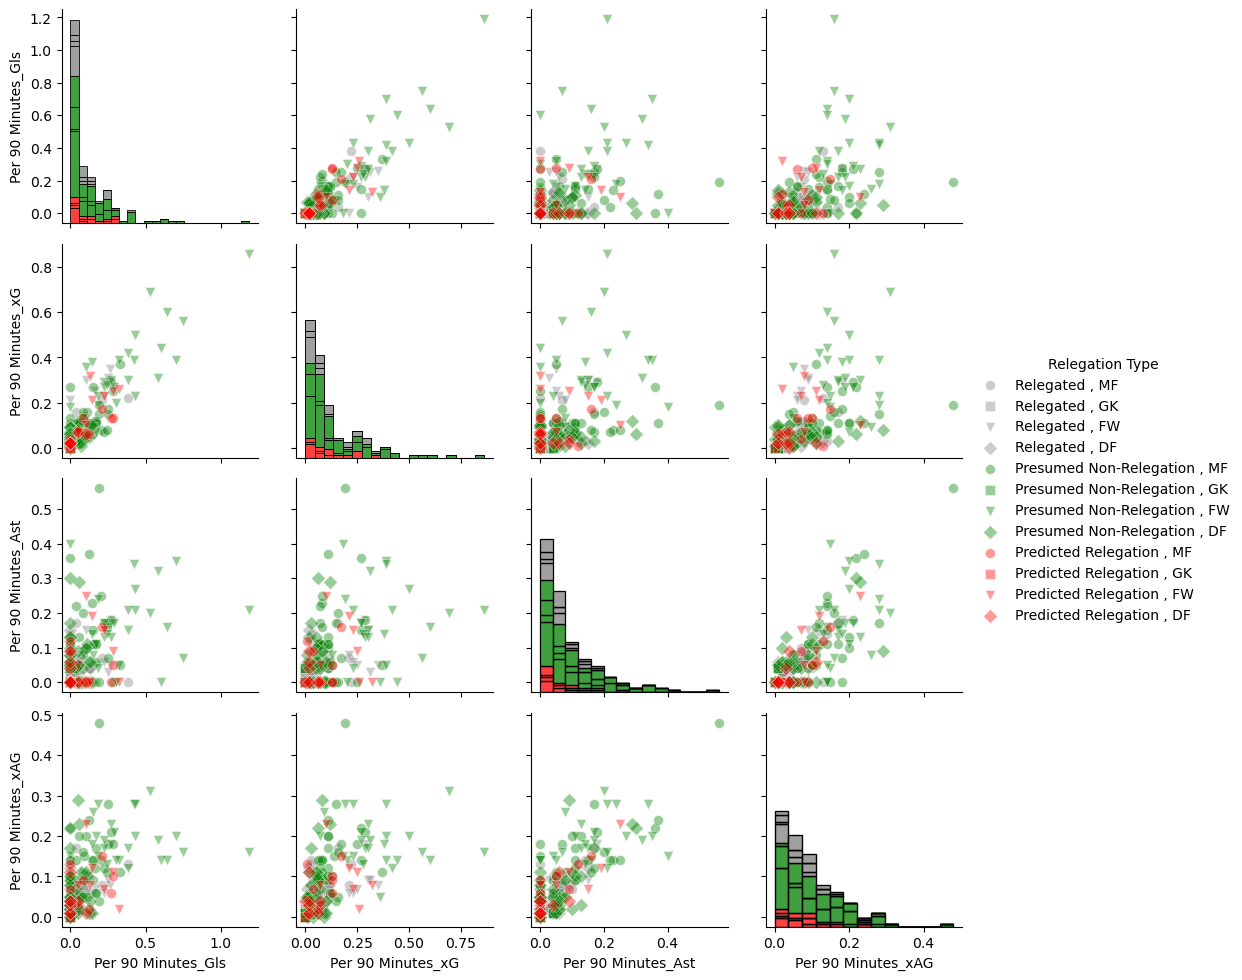

In [189]:
goals_assist = standard[['Identifier','Per 90 Minutes_Gls','Per 90 Minutes_xG', 'Per 90 Minutes_Ast','Per 90 Minutes_xAG']]
PlotPG(goals_assist)


In general across all the statistics, the players in the teams that are predicted to be relegated (PR) and the previously relegated teams (R) are clustered around the same area. On the contrary, the teams that are presumed to not be relegated (PNR) are more widespread, indicating that they scored more goals and assists across all the players' positions. The charts also show that the forwards in the PNR teams performed better than those that are R and PR, with some midfielders in the PNR teams performing better than the forwards in the R and PR teams. This is interesting to note because forwards are expected to score more goals in the match.

The expected goals versus the goals scored chart is portraying the ability for players to convert their opportunity to score. It shows that players from PNR teams are significantly getting more chances to score per match compared to R and PR teams, indicating that PNR players are able to get into better positions and have their chance. The forwards for PR and R teams are unable to get better chances and convert them compared to PNR teams.

#### 6.2.2 Progression

Next we will analyse the passes, receiving passes and carries towards the opponent's half of teams. This will help us analyse the teams' ability to reach and play around the opponents half which is an indication of teams' capability to dominate a game and possibly get a chance to score.

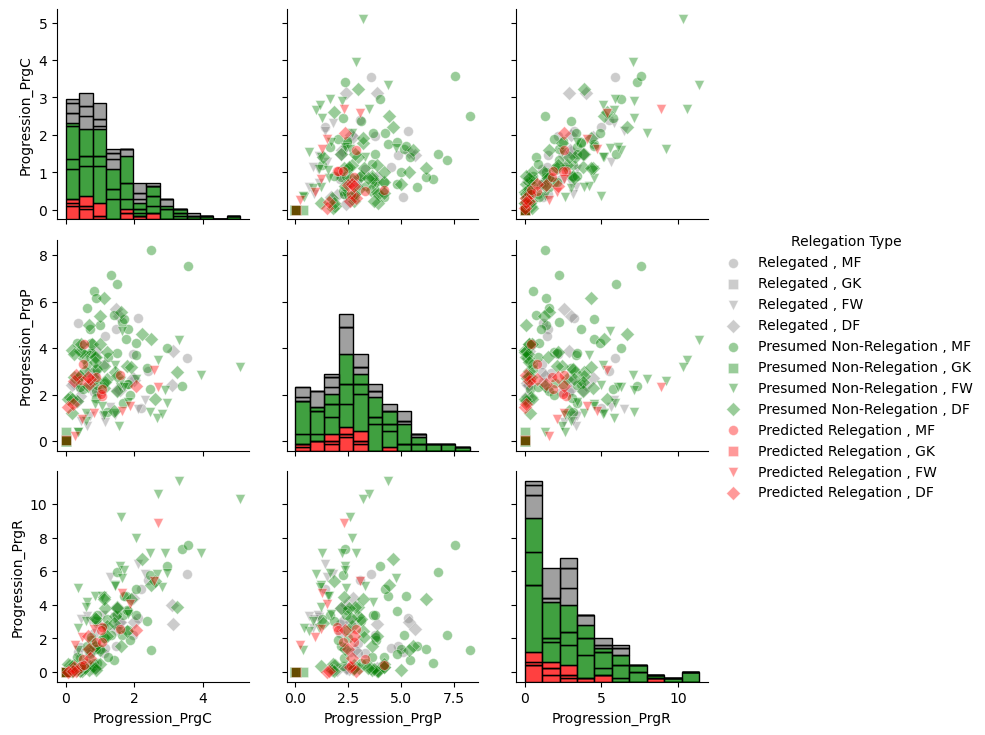

In [149]:
progression = standard[['Identifier','Standing Type','Progression_PrgC','Progression_PrgP', 'Progression_PrgR']]
PlotPG(progression)

From the `Progression_PRC` which indicates a player's ability to move the ball to the opponents half, it shows that the PR players heavily rely on the forwards whereas other PNR teams rely on midfielders and defenders as well. This is a sign that PR teams are unable to move towards the opponents half in a game as only forwards are moving the team forward toward's the opponent's goal. Overall, intuitively, since PR statistics lean on a more attacking emphasis, we see the attackers and midfielders having a significant role in the outcome of the teams. Attackers and midfielders who have performed better for their teams have shown to led their teams to the outcomes shown above where attackers and midfielders with higher points on their axes belonging to PNR teams while conversely we see teams with attackers and midfielder with a lesser impact being PR teams.  

#### 6.2.4 Cards

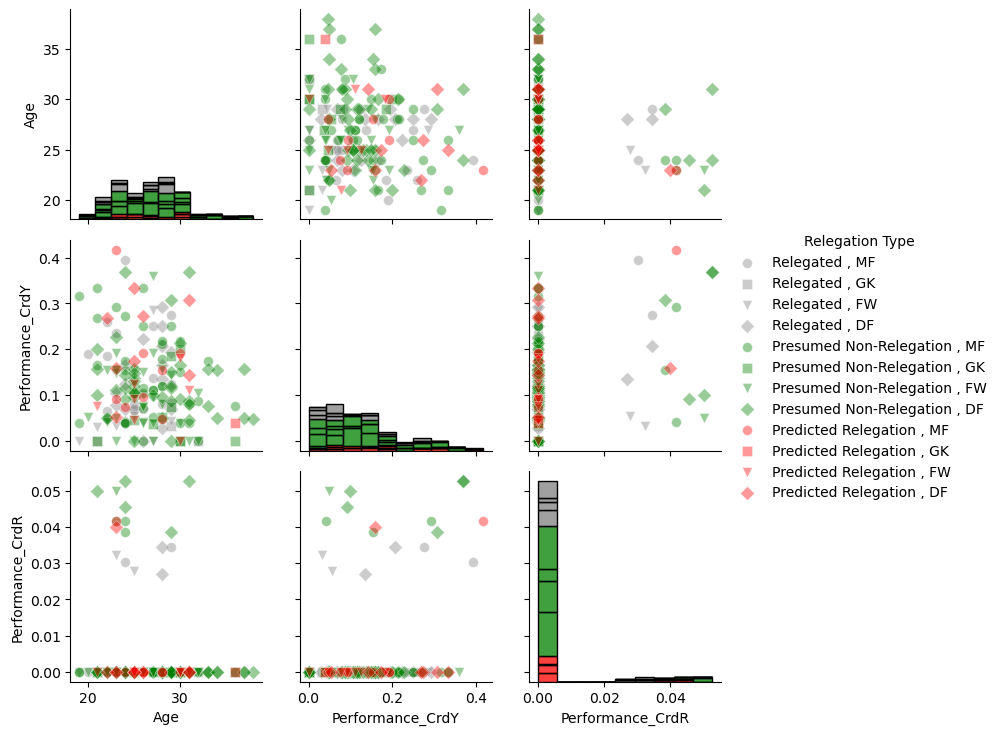

In [150]:
standard['Age'] = standard['Age'].astype(int)
cards = standard[['Identifier','Age','Performance_CrdY', 'Performance_CrdR']]
PlotPG(cards)

We can see from the performance charts that generally speaking, a higher rate of cards received by the PNR teams could indicate the possibility of a level of commitment and aggression crucial in strategically securing success for teams in general. However, the variables portrayed in the chart above does not tell us much about the relations between them and being relegated.

### 6.3 Goalkeeping

In [198]:
goalkeeping = RelegationType(r_squad_gk_df)

#### 6.3.1 Saves & Goals Conceded

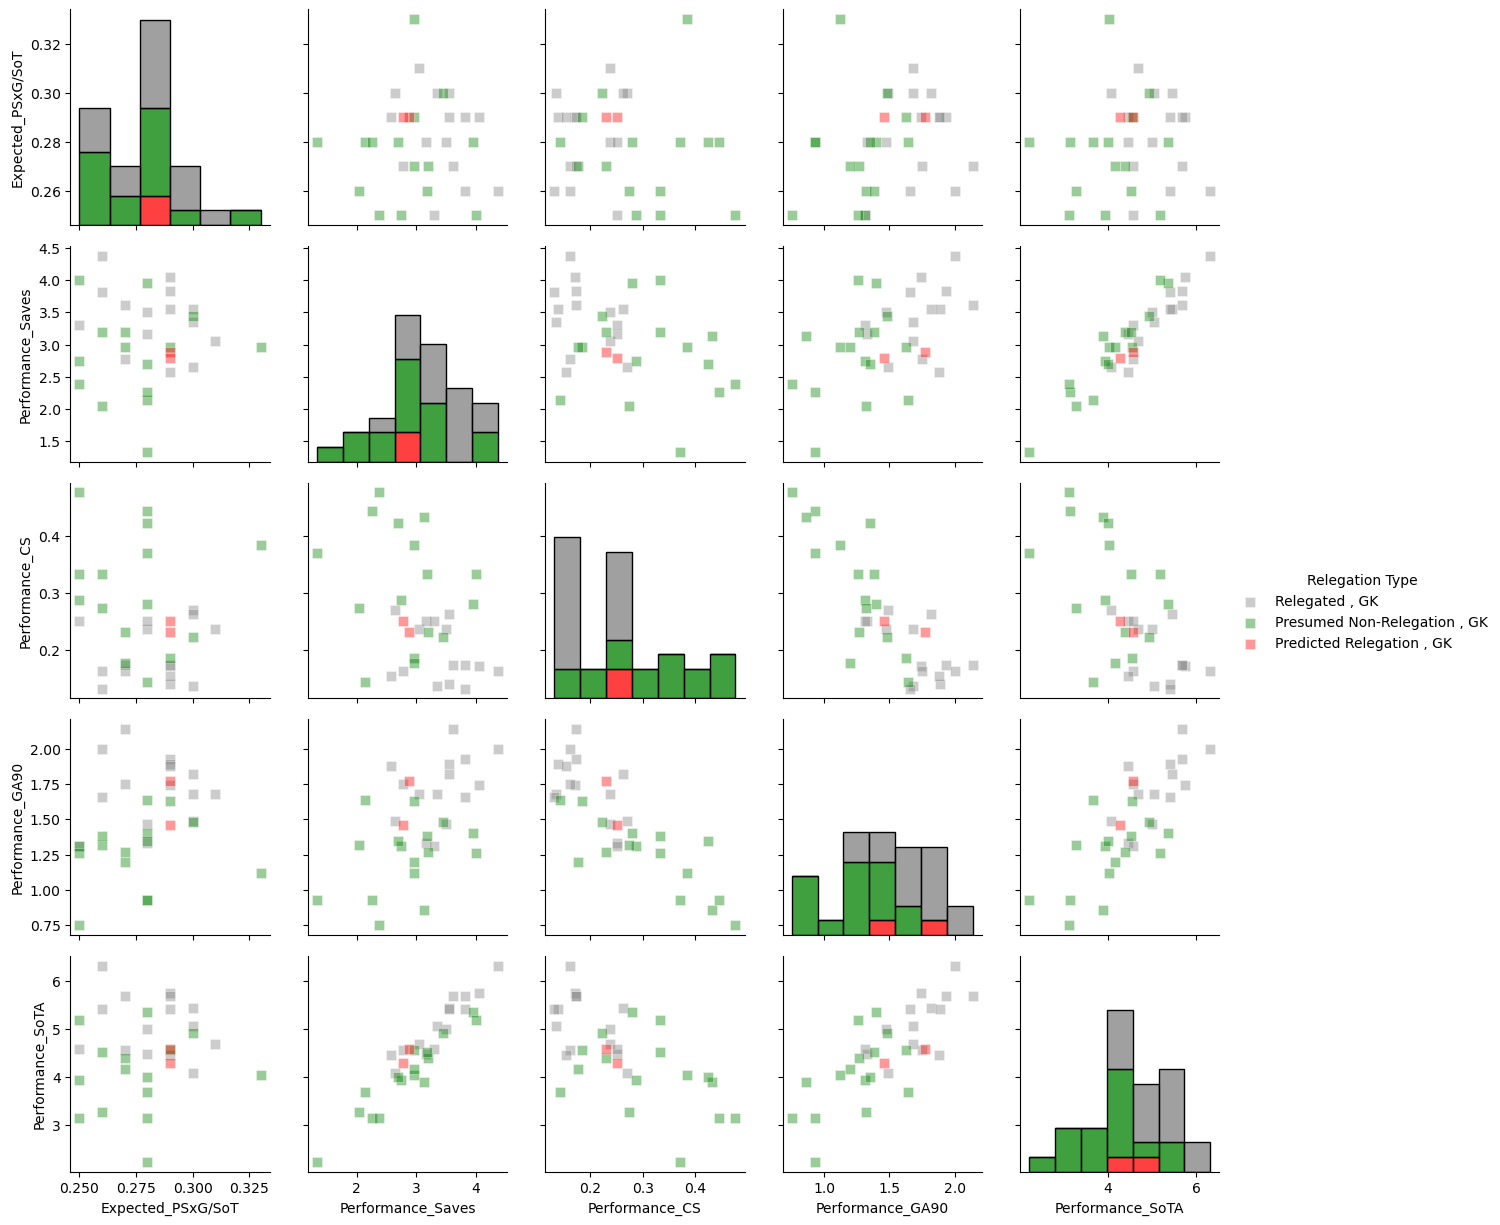

In [203]:
goalkeeping_saves = goalkeeping[['Identifier','Expected_PSxG/SoT','Performance_Saves','Performance_CS','Performance_GA90','Performance_SoTA']]
PlotPG(goalkeeping_saves)

This pair grid depicts the importance of goalkeepers to the outcome of the match. The PNR teams were able to save more goals (`Performance_Saves`), attain a clean sheet (`Performance_CS`), and concede less goals (`Performance_GA90`). On the other hand, R teams received more shots on target which their goalkeepers were unable to save, therefore increasing the number of goals that their opponents scored. This is just one of the factors that will play a major role on the outcome of the matches. 

Based on `Expected_PSxG/SoT` which is an indicator to the likelihood of a goalkeeper saving a shot on target, the PR players fair pretty well compared to the PNR players. However, the goals conceded per 90 minutes (`Performance_GA90`) for PR teams are still at the higher end of the chart along with the R teams which indicate a lack of consistency for the goalkeepers or higher quality of chances from their opponents.

However, it is important to note that the PR team only has only two goalkeepers present (signified by the red dots in each pair grid) due to our exclusion criteria that negates any player who played less than 19 games. We can assume that the PR team follows the patterns of the R team. 

#### 6.3.2 Goalkeeper Playstyle

##### 6.3.3.1 Goalkeeper Passing

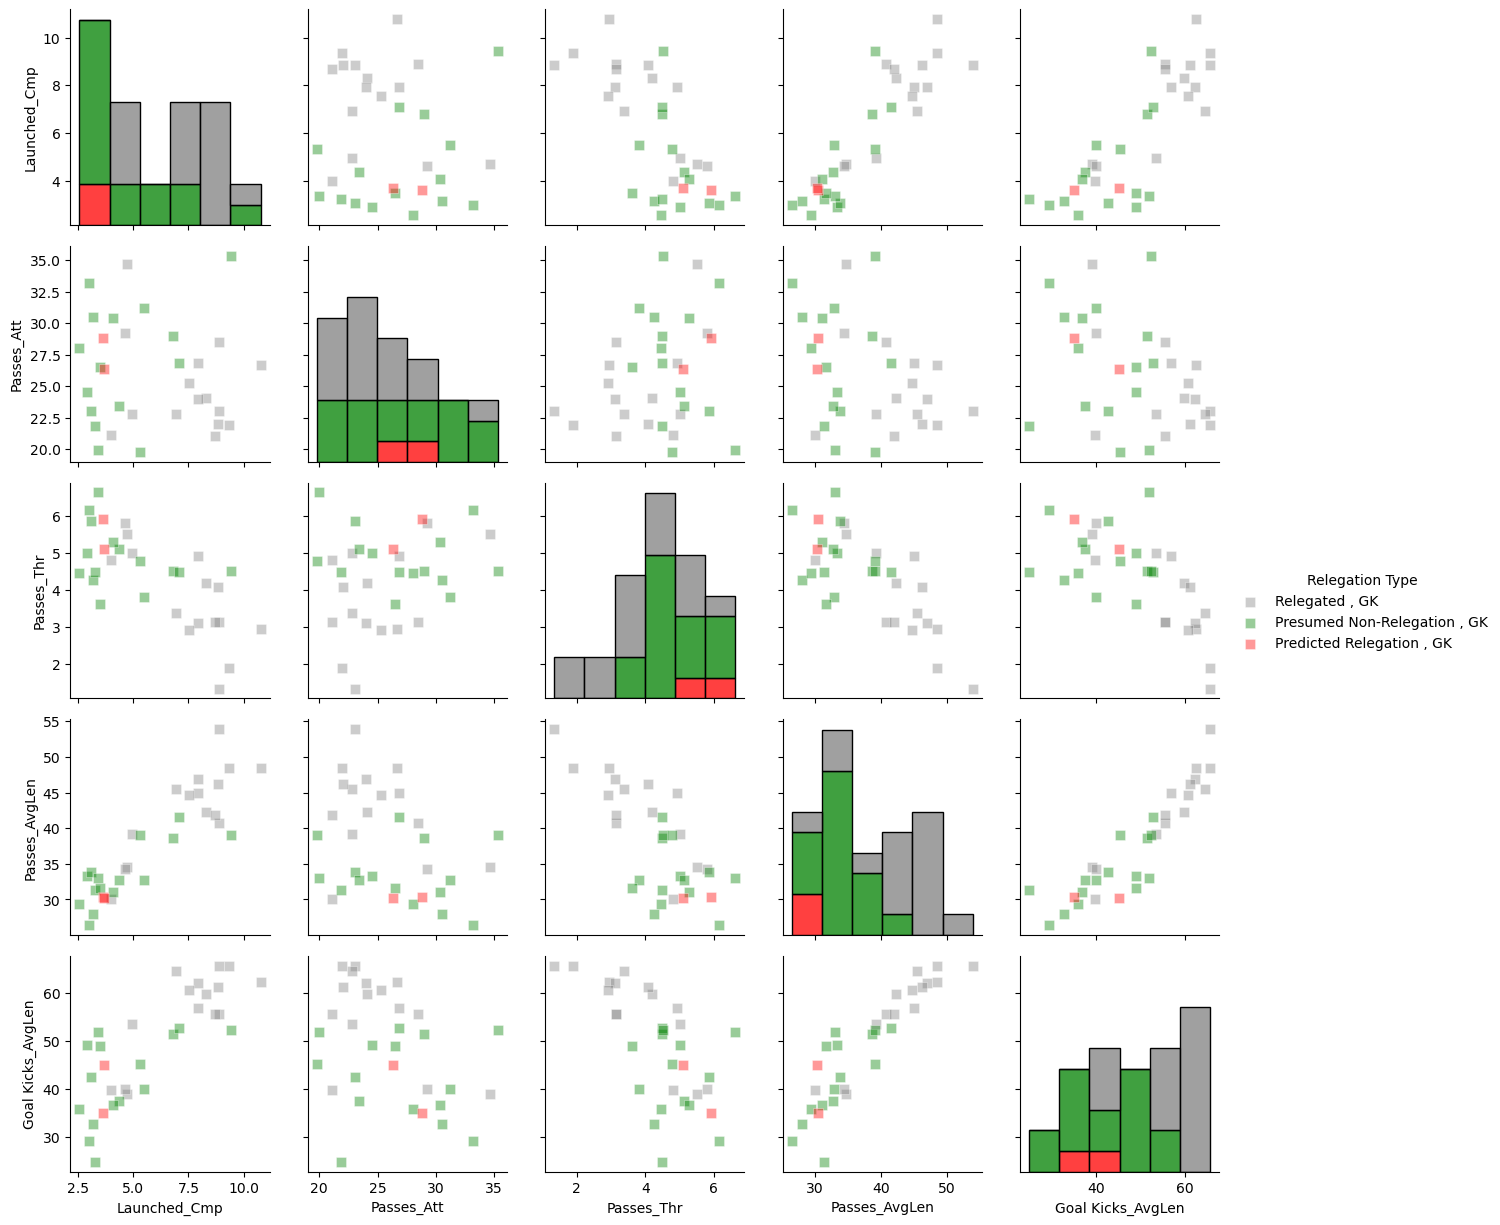

In [204]:
goalkeeping_pass = goalkeeping[['Identifier','Launched_Cmp','Passes_Att','Passes_Thr','Passes_AvgLen','Goal Kicks_AvgLen']]
PlotPG(goalkeeping_pass)

In modern football, goalkeepers have an important role in passing the ball forward and make crucial passes, unlike in the past where all they need to do is stop the ball from hitting the back of the net. Hence, analysing the passing statistic is also imperative.

We can see that from the R goalkeepers, passes are longer in distance to push the ball further away from the goal, but from the current season goalkeepers the passes are shorter in distance. Despite that, the PR goalkeepers seem to be incapable of making accurate long passes to their forward to create chances for their midfielders or forwards; they rather play it safe and make shorter passes and throws.

##### 6.3.3.2 Sweeperkeeper

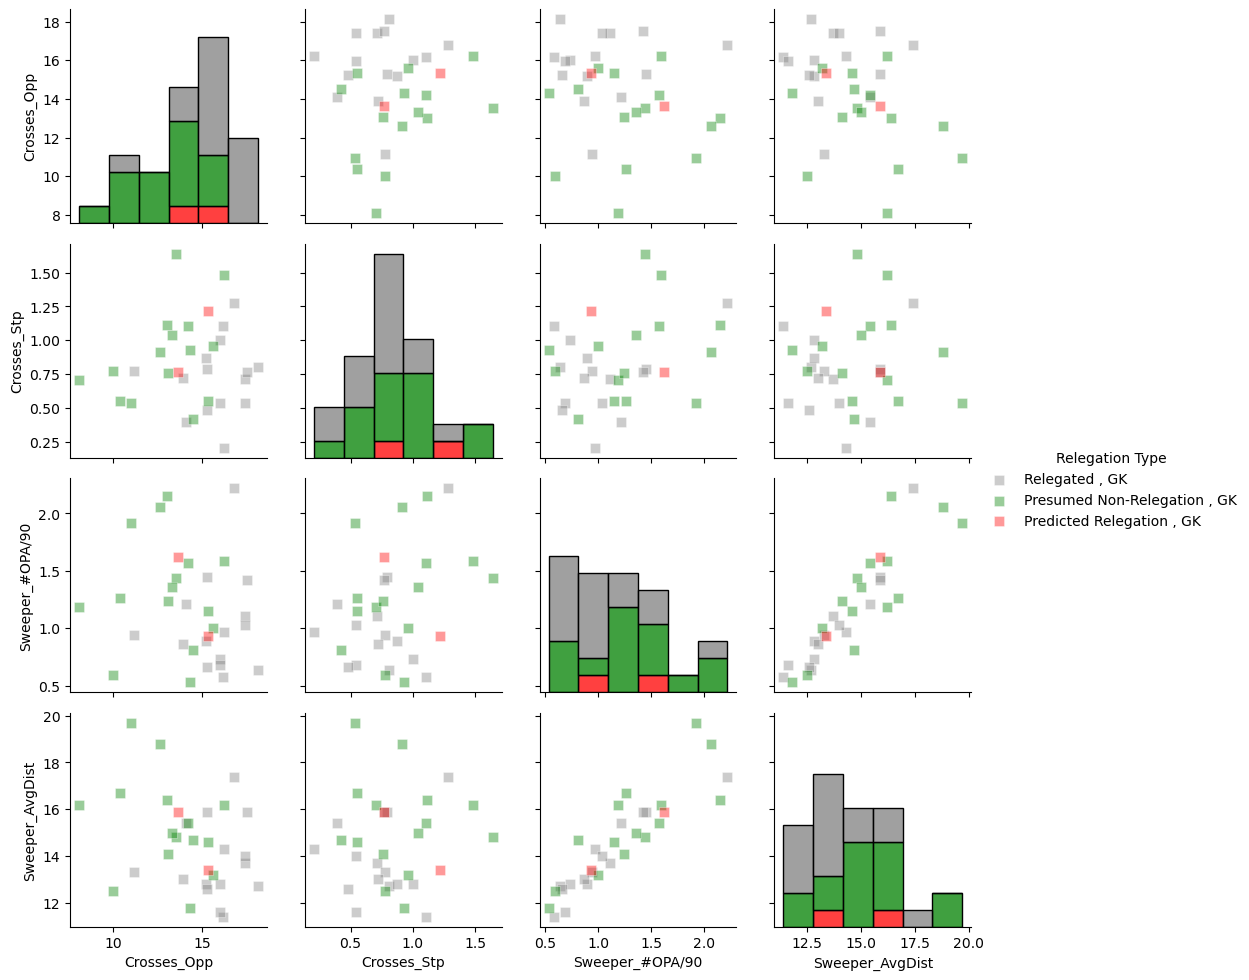

In [205]:
goalkeeping_sweep = goalkeeping[['Identifier','Crosses_Opp', 'Crosses_Stp','Sweeper_#OPA/90', 'Sweeper_AvgDist']]
PlotPG(goalkeeping_sweep)

The chart above shows the statistics of a modern goalkeeper being able to push forward out of their box to stop crosses (`Crosses_Stp`) and make defensive actions (`Sweeper_#OPA/90`). It shows that R goalkeepers from the past face more crosses as expected with PR goalkeepers clustering around them. However, the crosses that they are able to stop seems to be similar to the PNR teams, indicating a lack of ability to stop crosses and catch balls that are in the air.

PR and R goalkeepers tend to be closer to their goalpost and make less defensive actions outside of the box, reducing an extra man in defence when the opponents attack. However, individual goalkeepers regardless of their team have their own playing style, hence it is an important statistic to take note of since the game has evolved. 

### 6.4 Passing

In [156]:
passing = RelegationType(r_squad_pass_df)

#### 6.4.1 Passing Distance

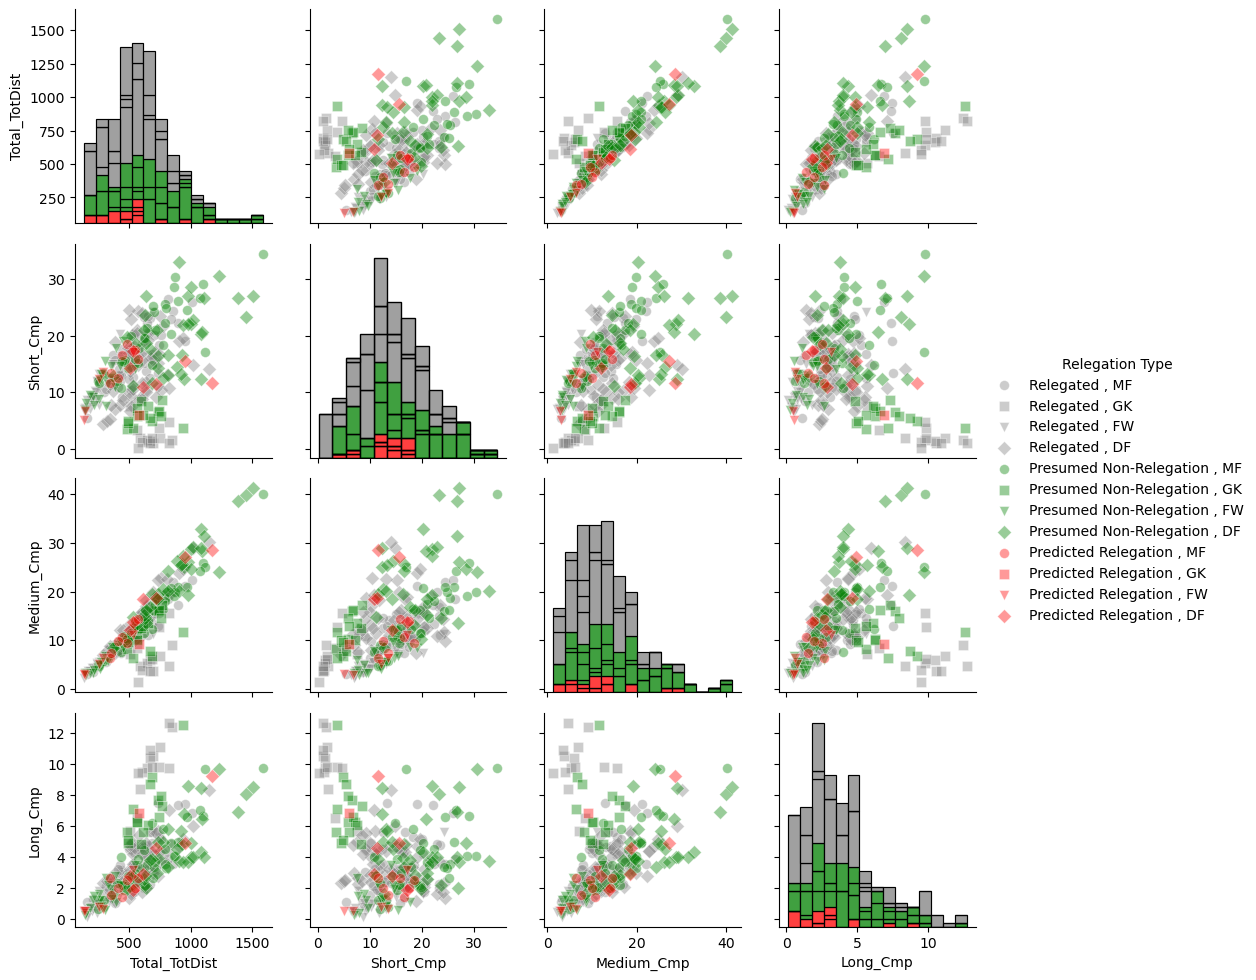

In [206]:
passing_dist =passing[['Identifier','Total_TotDist','Short_Cmp','Medium_Cmp','Long_Cmp']]
PlotPG(passing_dist)

From the chart above, it shows that players from R and PR teams tend to be able to only complete more short passes (`Short_Cmp`) in a game compared to PNR teams which shows the lack of quality in their passing abilities. With a lack of players making more long passes, the ball is unable to move more towards the opponent's half to make goal scoring chances. With PR and R teams completing lesser passes it shows that they are unable to control the possesion and create angles for their team mates.

#### 6.4.2 Dangerous Passes

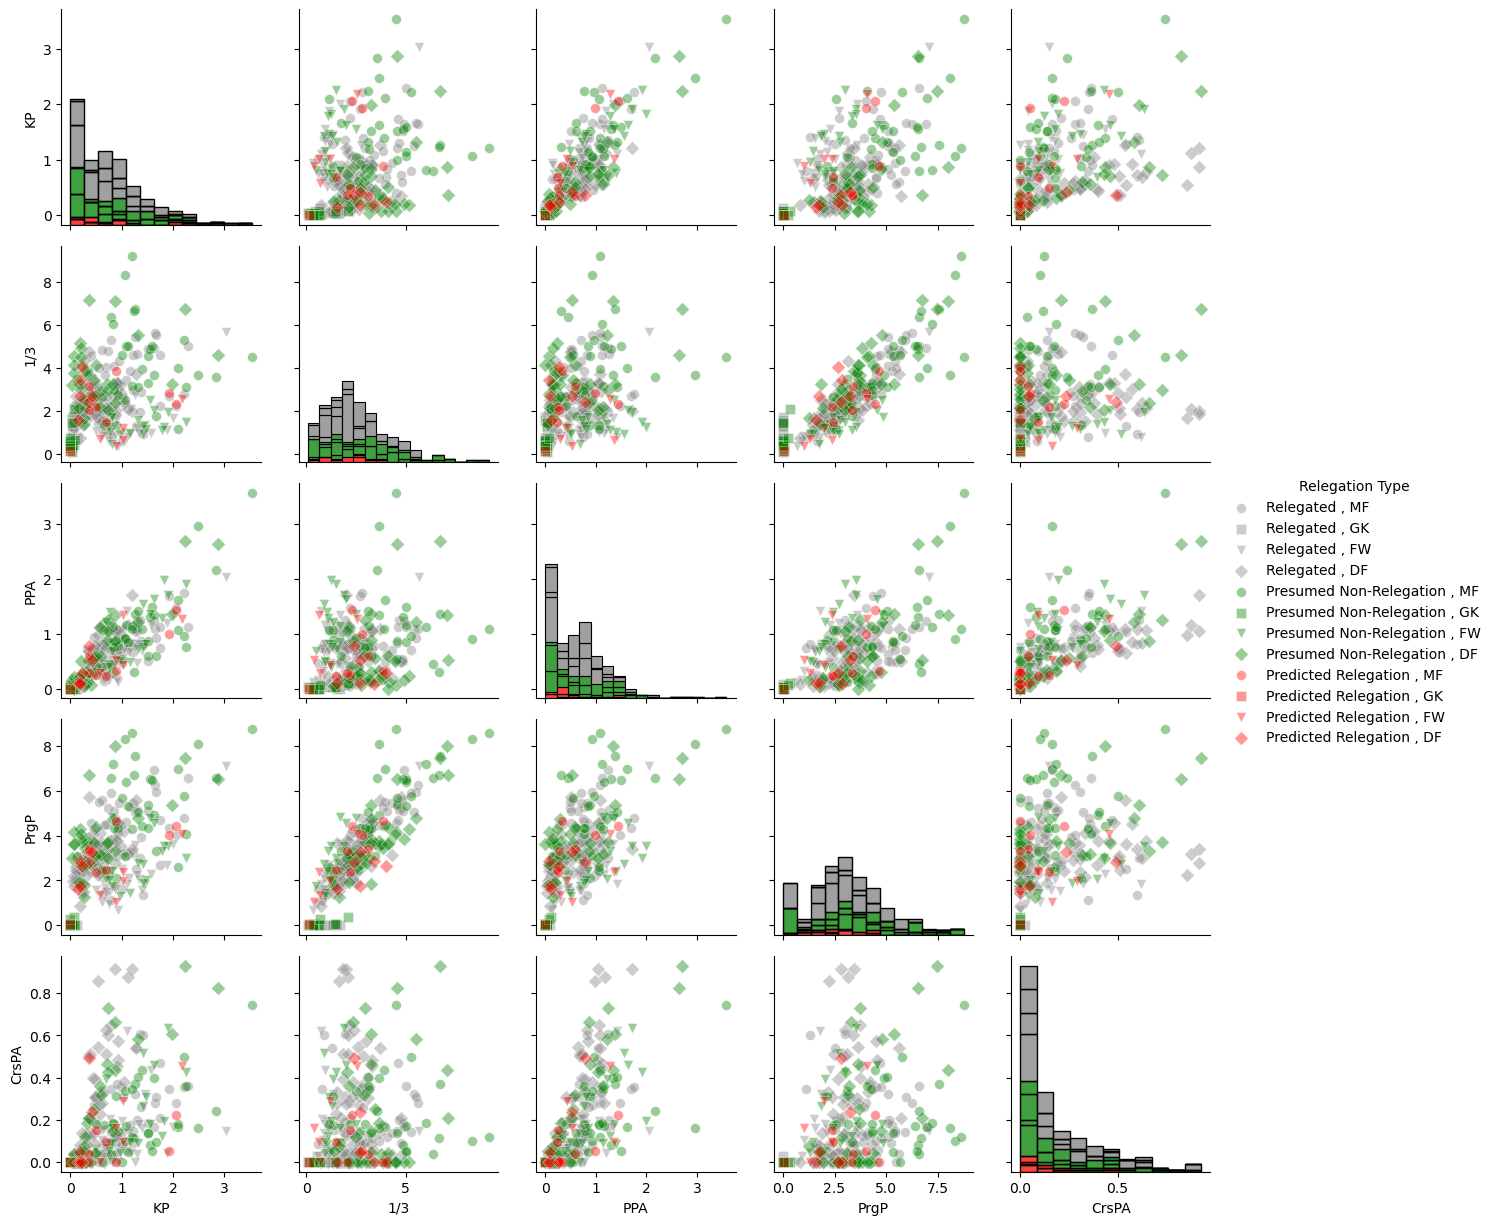

In [207]:
passing_danger = passing[['Identifier','KP', '1/3', 'PPA', 'PrgP','CrsPA']]
PlotPG(passing_danger)

From the chart above, we can see that PR and R teams make less key passes (`KP`) which are passes that lead to a direct chance to score, passes (`PPA`) and crosses (`CrsPA`) into the penalty area. They are heavily reliant of their forwards and midfielders to create those chances; however for PNR teams, their defenders are also able to create those chances, which means that not enough players are up front near the opponent's goal to create those chances and eventually win games. 

PR and R teams also make less progressive passes (`PrgP`) and passes into the final third (`1/3`) which reduces their chance to score and create opportunities.

#### 6.4.3 Passing Types

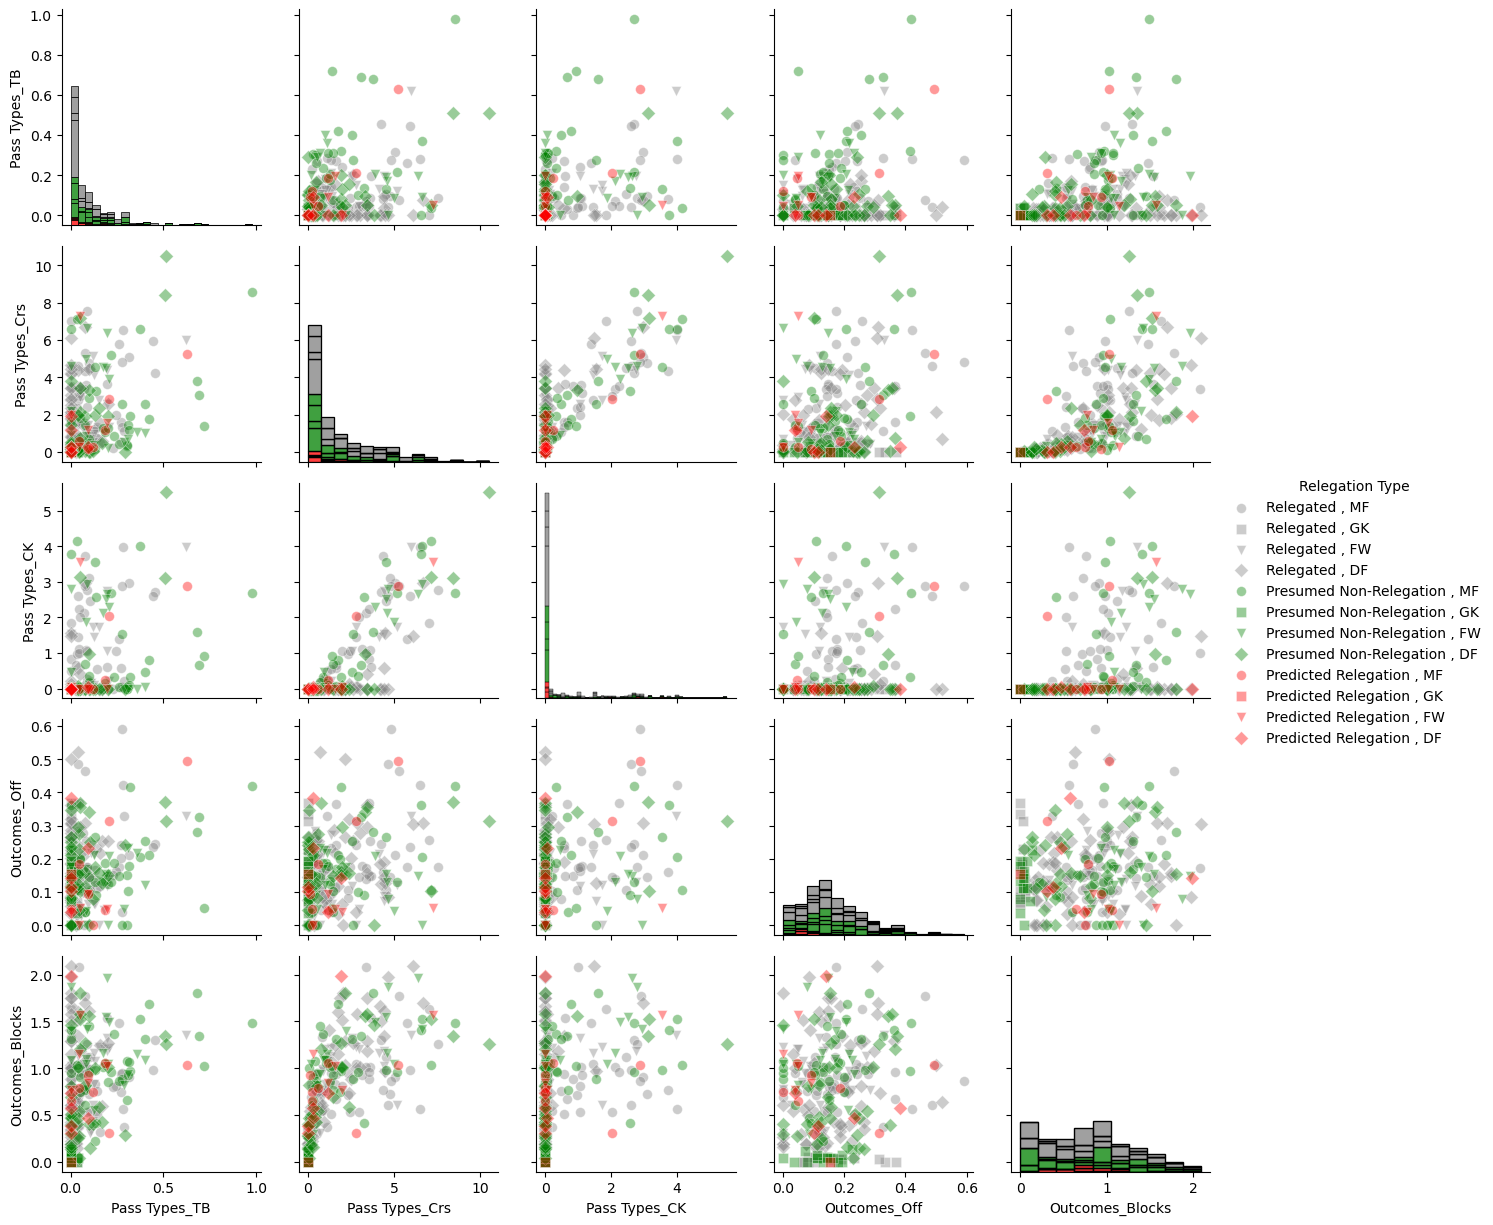

In [209]:
passing_types = passing[['Identifier','Pass Types_TB', 
                         'Pass Types_Crs', 'Pass Types_CK','Outcomes_Off',
                         'Outcomes_Blocks']]

PlotPG(passing_types)

Even though there are many pass types in the dataset to analyse, we will only analyse cruicial passes that lead to a chance to score or create angles to move forward like through balls (`Pass Types_TB`), crosses (`Pass Types_Crs`) and corner kicks (`Pass Types_CK`). From the chart above, we can see that PR teams only rely on 2 or 3 players to make those passes whereas PNR teams rely on players from different positions, even defenders. The passes made by R and PR teams are also more likely to be offside (`Outcomes_Off`) and blocked (`Outcomes_Blocks`) which means their passes are easily intercepted or passed at the wrong time.

### 6.5 Shooting

In [160]:
shooting = RelegationType(r_squad_shoot_df)

#### 6.5.1 Shot Accuracy

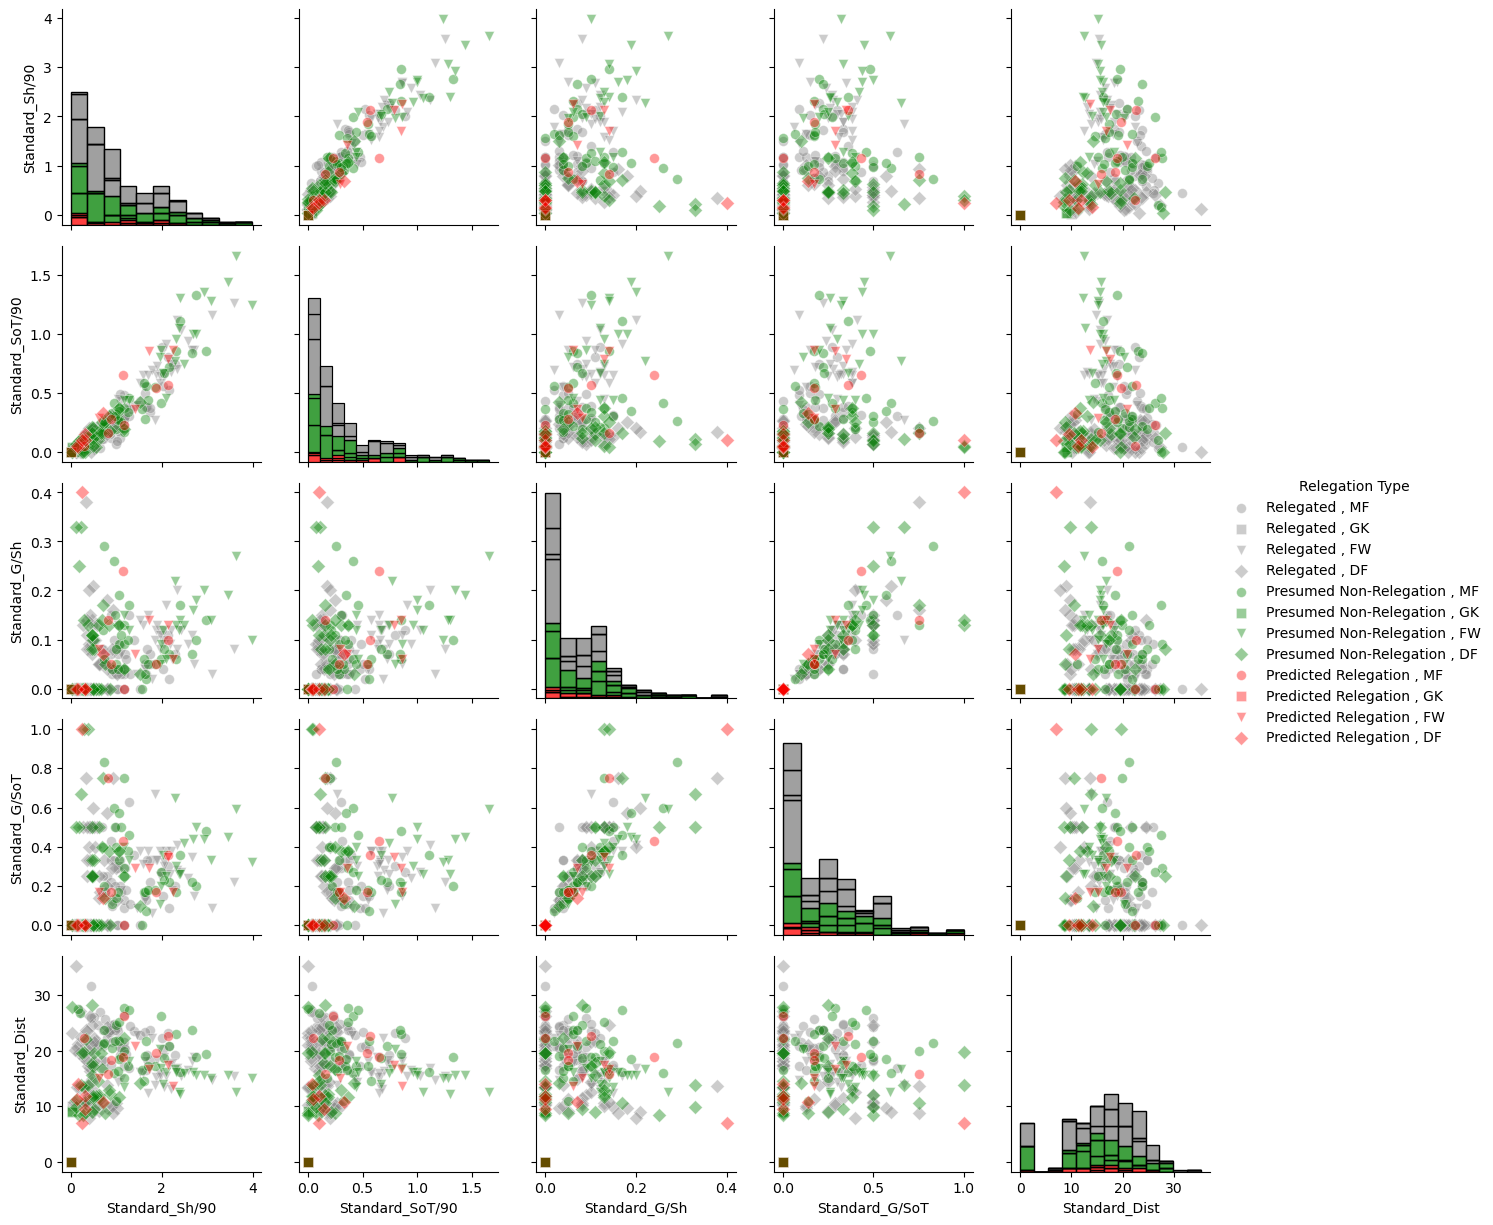

In [211]:
shooting_accuracy = shooting[['Identifier', 'Standard_Sh/90','Standard_SoT/90', 'Standard_G/Sh', 'Standard_G/SoT', 'Standard_Dist']]

PlotPG(shooting_accuracy)

The chart above differentiates the shooting behaviour of players. It shows that R and PR teams have around 2 shots or less per game (`Stardard_Sh/90`) with around 1 or less shots on target (`Standard_SoT/90`). This means that even though their goal per shot (`Standard_G/Sh`) and goal per shot on target (`Standard_G/SoT`) is reasonable and indistinguishable from the PNR teams, not enough chances are given to the players for them to score.

The average distance for each shot (`Standard_Dist`) for PR and R players tends to be further away from the goal post, meaning that the quality of shots taken are lower as goalkeepers are more likely able to save shots further away from goal.

#### 6.5.2 Shot Creating Actions

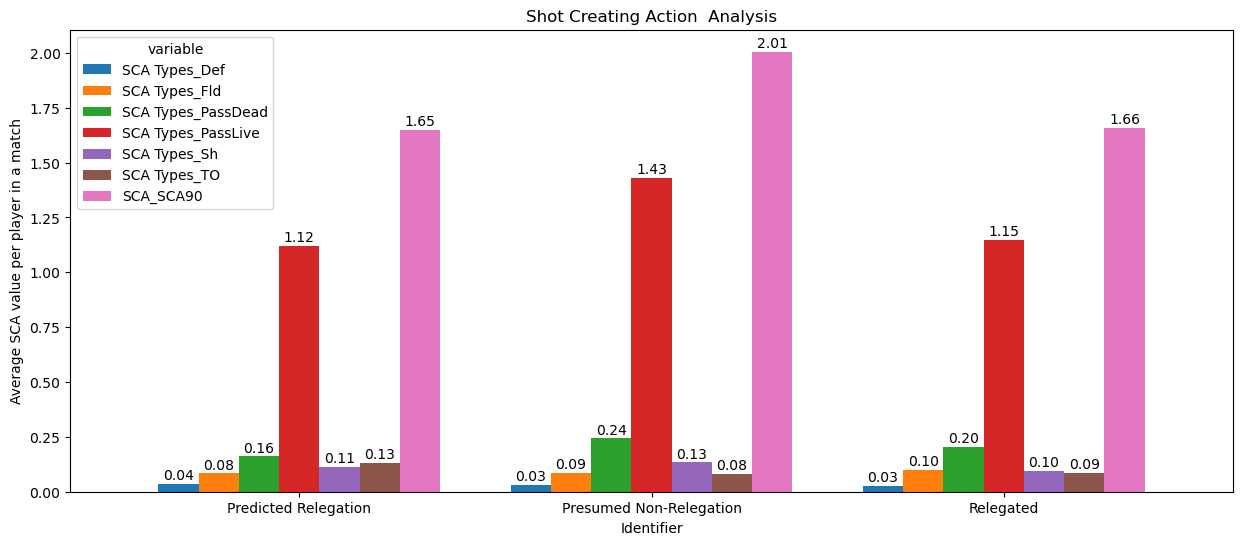

In [ ]:
shooting_sca = shooting[['Identifier', 'SCA_SCA90', 'SCA Types_PassLive', 'SCA Types_PassDead',
       'SCA Types_TO', 'SCA Types_Sh', 'SCA Types_Fld', 'SCA Types_Def']]

#Processing for visualisation
shooting_sca = shooting_sca.melt(['Identifier'])

shooting_sca['Identifier'] = shooting_sca['Identifier'].apply(lambda x: x[:-5])

#calculate mean per player and pivot
shooting_sca = shooting_sca.groupby(['Identifier','variable'])['value'].mean().reset_index()
shooting_sca_plot_df = shooting_sca.pivot(index = 'Identifier', columns = 'variable', values = 'value')


#Bar chart
sca_plot = shooting_sca_plot_df.plot(kind = 'bar',stacked = False, figsize=(15, 6),width = 0.8)
sca_plot.set_xticklabels(sca_plot.get_xticklabels(), rotation=0)

plt.ylabel('Average SCA value per player in a match')

plt.title('Shot Creating Action  Analysis')

for bar in sca_plot.patches:
    sca_plot.text(
    bar.get_x() + bar.get_width() / 2,
    bar.get_height()+0.02 + bar.get_y(),
    '{:.2f}'.format(bar.get_height()), ha='center'),
    ha='center',
    va = 'center',
    color='black',
    weight='bold',
    size=8


The bar chart above depicts the various statistics of shot-creating action types - defensive actions (`SCA Types_Def`), fouls that led to a shot attempt (`SCA Types_Fld`), dead-ball passes (`SCA Types_PassDead`), live-ball passes (`SCA Types_PassLive`), shots that led to another shot attempt (`SCA Type_Sh`), successful take-ons that led to a shot attempt (`SCA_TO`), and shot-creating actions per 90 minutes (`SCA_SCA90`). From this chart, we can tell almost immediately that the most prominent differentiating factor between PR/R and PNR teams is the shot-creating actions within the 90-minutes match. This metric informs us that PNR team players are better at generating goal-scoring opportunities, which could imply better teamwork and overall skill. In addition, although most of the variables are rather even for PR/R versus PNR teams, PNR teams are slightly better at live-ball passes. This is considered to be a high-value shot attempt as it takes advantage of short defensive breakdowns and occurs in close range [10]. The only shot-creating action that R/PR teams perform better in is `SCA Types_TO`, which correlates to the chart in section 6.7.1 where players in relegated teams have more take-ons.

### 6.6 Defending

In [164]:
defending = RelegationType(r_squad_def_df)

#### 6.6.1 Tackles

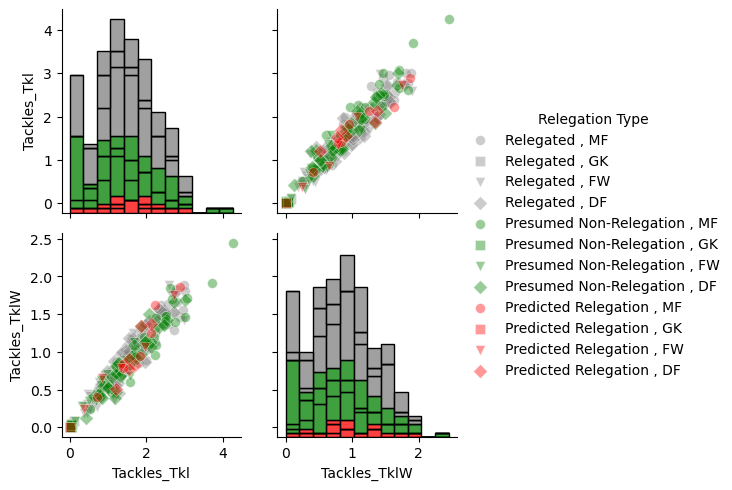

In [218]:
def_tackles = defending[['Identifier','Tackles_Tkl', 'Tackles_TklW']]
PlotPG(def_tackles)

This pair grid depicts the number of tackles as well as the number of tackles won for each team. These 2 variables were selected out of all the tackle variables as they are the most important ones for comparison. We may observe that there is no significant difference amongst all the teams, whereby even the PNR team did not win substantially more tackles. We can therefore infer that this variable does not play much into the outcome of the matches. It is possible that all players have similar competencies when it comes to tackling, however R teams would receive more attacking pressure from their opponents. R team players should therefore try to tackle more to gain possession of the ball as much as possible.

#### 6.6.2 Challenges

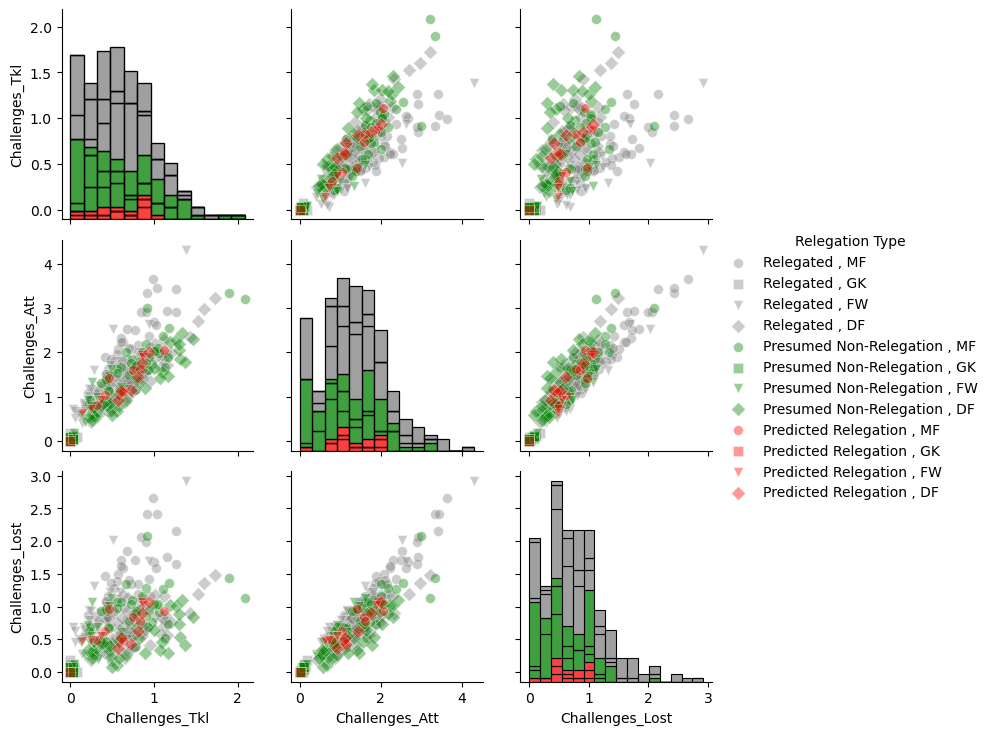

In [166]:
def_challenges = defending[['Identifier','Challenges_Tkl', 'Challenges_Att', 'Challenges_Lost']]
PlotPG(def_challenges)

Challenges are defined as the amount of pressure that the team gives to their opponents while they are attacking. The top row depicts the number of times the team tackled the opponent teams' dribblers (`Challenges_Tkl`), the middle row shows the number of attempted tackles on the opponent teams' dribblers (`Challenges_Att`), and the last row is the number of unsuccessful attempts to challenge a dribbling player (`Challenges_Lost`). It appears that the total number of tackles do not differ much for the PNR and R teams, but they tackled a lot more than the PR teams. We should keep in mind that there are only 3 PR teams, which could be the reason behind why their tackling is significantly lesser. We may also observe that R teams dominated in the second row of charts, showing that they attempted a lot more tackles as compared to the other 2 teams. However, they also have the largest percentage of lost tackles. Overall, being able to tackle more times does not mean that the team will succeed - in fact, it could be portrayed as an energy-depleting way that is more detrimental than beneficial. While teams should generally focus more on gaining possession of the ball, it is more important to tackle with precision than to haphazardly tackle and fail while doing so. 

#### 6.6.3 Other Statistics

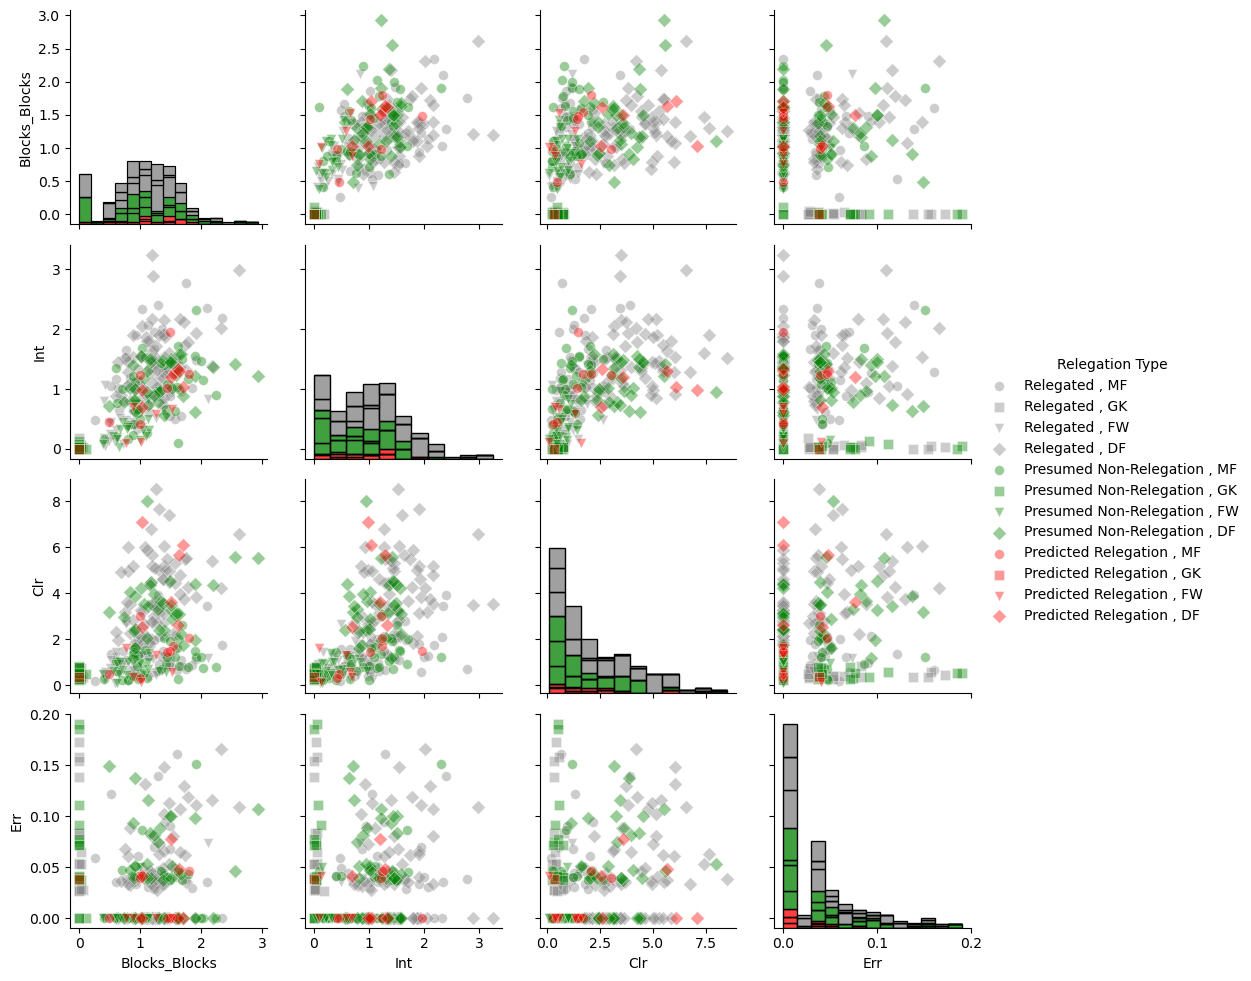

In [213]:
def_other = defending[['Identifier','Blocks_Blocks', 'Int', 'Clr', 'Err']]
PlotPG(def_other)

This pair grid exhibits the defensive actions across these teams - blocks to a shot or pass (`Blocks_Blocks`), interceptions (`Int`), clearances (`Clr`) and errors (`Err`). The errors and blocks are rather evenly spread, without any team dominating the number of blocks. Predictably, the R teams intercepted and cleared more as compared to the PNR teams. Even though there are fewer data points for the PR teams, we can still see that their interceptions and clearances are towards the higher end of the spectrum as compared to the PNR teams. This is due to the fact that teams which are losing are attacked more frequently by their opponents, hence they need to intercept more often. Clearances are defensive actions usually taken when the opponents are threatening to score a goal as the ball is in a dangerous position, which explains why PR and R teams perform this action more frequently than PNR teams. This informs us that weaker teams should work on their defensiveness to prevent themselves from being in a situation that requires clearances. 

### 6.7 Possession

In [168]:
poss = RelegationType(r_squad_poss_df)


#### 6.7.1 Take-Ons and Carries

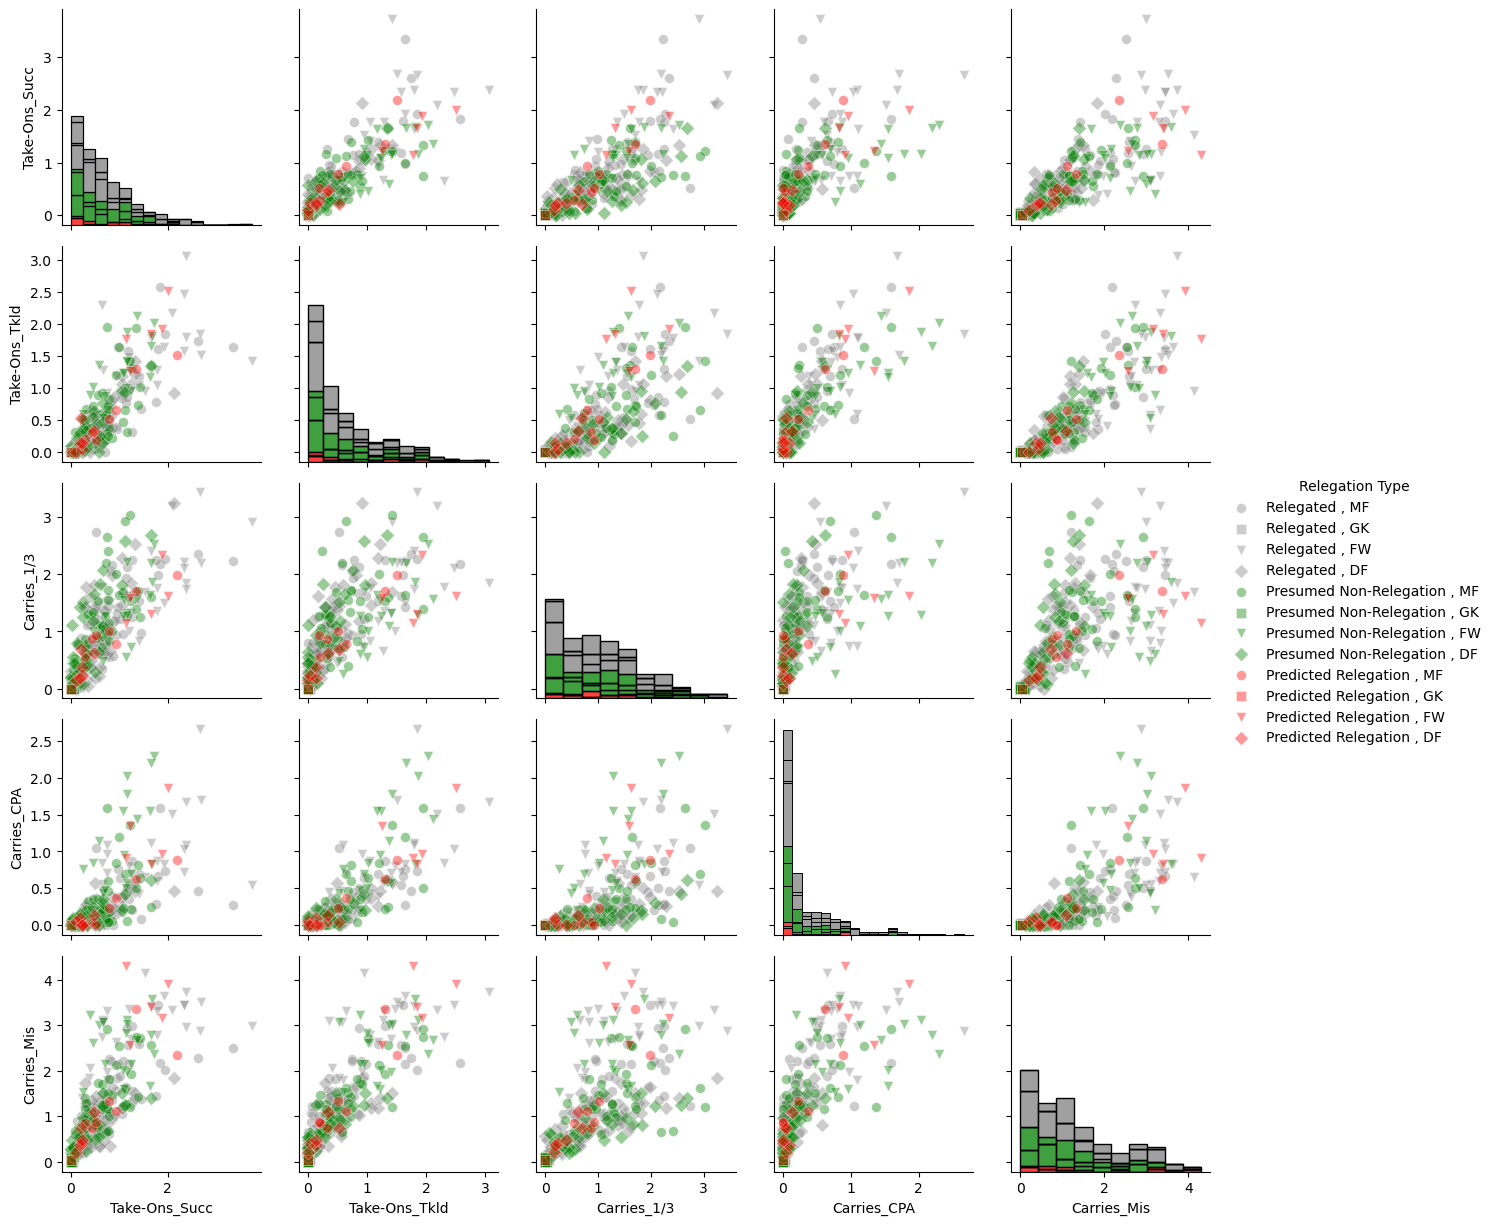

In [216]:
dribbling = poss[['Identifier','Take-Ons_Succ', 'Take-Ons_Tkld', 'Carries_1/3', 'Carries_CPA','Carries_Mis']]
#Still have receiving havent plot
PlotPG(dribbling)

This pair grid shows the take-ons and carries - successful attempts to go past defenders while dribbling (`Take-Ons_Succ`), number of times tackled by defender during a take-on attempt (`Take-Ons_Tkld`), carries towards the opponents' side (`Carries_1/3`), carries into the opponents' penalty area (`Carries_CPA`), and miscontrols resulting in losing possession (`Carries_Mis`). R teams were interestingly able to successfully dribble past the defenders more per game than PNR and PR teams. The fact that they were able to do this but still losing in the league shows that they do not have other teammates around them available to pass to and create chances to score. This is further evidenced by the chart at Section 6.5.2 which shows a lower number of shot-creating passes by R teams. In addition, the goalkeepers were overall better in PNR teams in Chart 6.3.1, suggesting that the players were able to dribble past defenders but unable to get past the goalkeepers. The statistics are evenly spread for `Take-On_Tklds`, `Carries_1/3`, and `Carries_CPA`. The most notable difference lies within `Carries_Mis`, which unfortunately shows that PR and R teams have significantly more miscontrols which resulted in them losing possession of the ball. Despite only having 3 teams in the PR category, they failed in gaining control of the ball more so than PNR teams. This could be the result of pressure from the opponents' teams, causing them to have an increase in misjudgement and inaccuracies in their carries. 

#### 6.6.2 Possession

C:\Users\huang\AppData\Local\Temp\ipykernel_13612\2870018519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous_poss['Standing Type'] = previous_poss['Standing Type'].map({0: 'Not Relegated', 1: 'Relegated'})


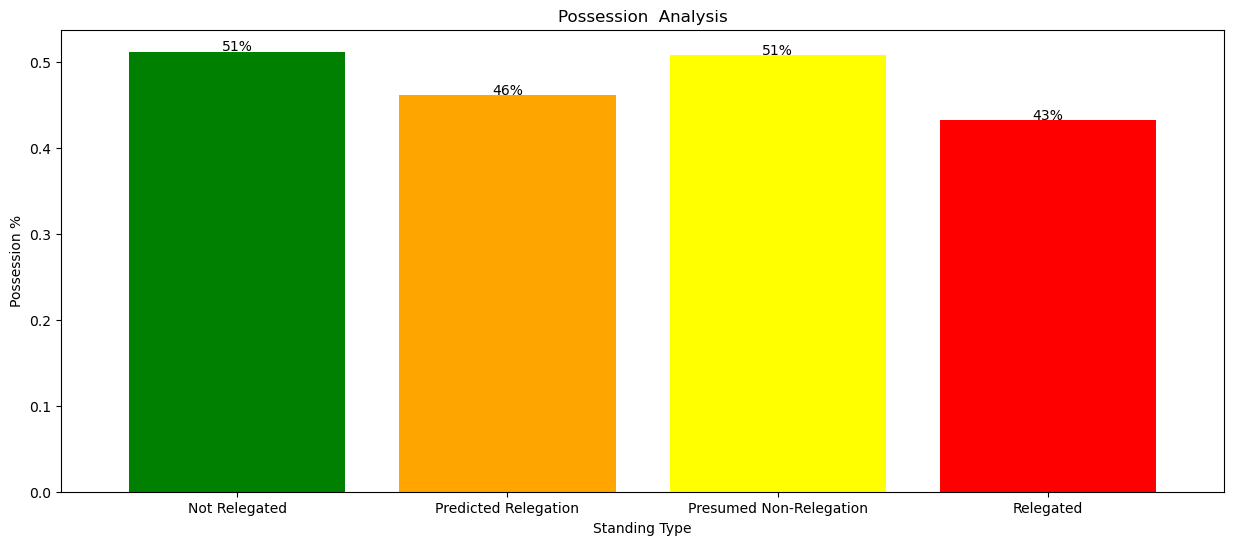

In [334]:
poss_df_2 = poss_df.query('Season in ("2017-2018","2018-2019","2019-2020","2020-2021","2021-2022","2022-2023")')
current_poss = poss_df_2.query('`Season` == "2022-2023"').drop(columns = 'Standing Type').merge(p_df, how = 'left', on = "Squad")
previous_poss = poss_df_2.query('`Season` != "2022-2023"')
previous_poss['Standing Type'] = previous_poss['Standing Type'].map({0: 'Not Relegated', 1: 'Relegated'})
poss_df_3 = pd.concat([current_poss,previous_poss])

#calculate mean per squad and pivot
poss_df_plot = poss_df_3.groupby(['Standing Type'])['Poss'].mean().reset_index()
poss_df_plot['Poss'] = poss_df_plot['Poss']/100
poss_colors = {'Relegated': 'red', 'Predicted Relegation': 'orange', 'Not Relegated': 'green', 'Presumed Non-Relegation': 'yellow'}
poss_df_plot['color'] = poss_df_plot['Standing Type'].map(poss_colors)

poss_plot = poss_df_plot.plot(kind='bar', x='Standing Type', y='Poss', color=poss_df_plot['color'],figsize=(15, 6), width=0.8, legend = False)
poss_plot.set_xticklabels(poss_plot.get_xticklabels(), rotation=0)

plt.ylabel('Possession %')
plt.title('Possession  Analysis')

for bar in poss_plot.patches:
    poss_plot.text(
    bar.get_x() + bar.get_width() / 2,
    bar.get_height()+0.001 + bar.get_y(),
    '{:.0%}'.format(bar.get_height()), ha='center'),
    ha='center',
    va = 'center',
    color='black',
    weight='bold',
    size=8

Lastly, this bar chart showcases the average possession for each category of teams. The PNR and NR teams have an equal possession average of 51% whereas the PR and R teams are slightly lower at 46% and 43% respectively. Although the differences are not too significant, possession is a key part of winning the match as the team with more possession of the ball can generate more goal-scoring opportunities and limit the chances of their opponents scoring. The only way to counter a team's frequent ball possession is by increasing their defense, but since the statistics show a correlation between increased average possession with a decreased chance of relegation, it suggests that increasing possession is a better strategy. 

## 7 Conclusion

### 7.1 Summary of outcomes

In this project, we delved deep into various statistics of relegated teams, non-relegated teams, and teams that are predicted to be relegated. The project objective was to analyse the results of the Keras model to narrow down the predicted relegated and classified weaker teams and analyse whether they have similar patterns to previously relegated teams.

In this project, we sought to meet these objectives:
  1. Scrape, clean and process data for machine learning and analysis
  2. Perform feature engineering to standardise the data scraped and fill in missing information
  3. Feed the cleaned data into the Keras model for prediction
  4. Analyse the performance of the teams playing in the ongoing season along with the previously relegated teams
  5. Use data visualisations and statistics to identify patterns and trends of poorly performing teams

The project objectives have been met to train the Keras model to predict poorer performance teams that could be relegated. We also validated the results through further analysis using visualisations and feature engineering.

### 7.2 Summary of findings

Overall, there are a few main insights that we can conclude from this project:
  1. Most of the statistics showed a major, obvious difference between PR/R teams and PNR teams. All the observed dissimilarities were minute, which indicates that better-performing teams rely on many different strategies to secure their placement in the league. 
  2. Most of the analysed statistics were predictable when it comes to differentiating between better- and poorer-performing teams. To summarise what we found for the PNR teams: they had more goals, assists and clean sheets, they relied fully on all players' positions instead of just the forwards when it came to scoring goals, they were able to complete longer and more crucial passes, generated more shot-creating actions, had more attempted tackles, and took more possession of the ball throughout the game. 
  3. Although the differences were small for each analysed statistic, PNR teams took advantage of these to generate an edge over their competitors. It requires every player to do more than just their role (i.e., goalkeepers helping their team mates to score goals instead of just making saves) and this could be the defining factor to avoid relegation.
  4. The most interesting insight was that PR and R forwards were able to dribble past defenders better than PNR players. This showed an over-reliance on PR/R teams on their forwards to create goal-scoring chances. However, the fact that they are still lower in the league indicates that either their opponents had incredible defense, or that their goal-scoring opportunities were lacking. 
  5. We should not predict the ending position of a team based on their current position, as the machine learning algorithm predicted teams that are currently above the relegation zone to be relegated as well (i.e., Wolverhampton Wanderers who are currently 13th place). On the contrary, we need to look at underlying statistics to get an in-depth view rather than just take their current position at face value.

### 7.3 Limitations of approach

This approach relies heavily on the statistics of teams in previous seasons. With the game constantly evolving and play styles changing, it is difficult to predict and assume the relegated teams as the strategies might be different across seasons. For example, the goalkeepers from previously relegated teams seem to make longer passes whereas the goalkeepers in the current season tend to make shorter passes. We are also unable to predict statistics such as future injuries in crucial players, future transfers, morale and mindset in current players, or changes in managers which could boost a team's overall performance. All of these factors could shift a team's eventual placing on the league table.

Not all advanced statistics are available from the 1992-1993 season, which could affect the accuracy of our machine learning algorithm. With more datapoints, we would be able to feed more data into the machine learning algorithm which could potentially predict the relegated teams more accurately. 

The FBref website only allows us to make 20 requests per minute, hence our analysis only consists of previously relegated teams and this will deteriorate the performance of our scraping. We would need to scrape over 900 links to successfully scrape all the data required for a complete analysis.

In this project, we only focused on the premier league data whereas teams play more than one competition throughout the season and the results from other competitions could affect their performance in the premier league. For example, Bournemouth only got promoted to the premier league in the current season, and their performance in the Championship was not taken into account in the machine learning algorithm. 

Finally, football is more than just data - it involves hundreds of players, all of whom have varying motivating factors and challenges which data cannot account for. Hence, even though the machine learning algorithm predicted the teams that might be relegated, all it takes is just one special moment in a game or in a player's life to turn everything around. 

## 8 References

[1] Baboota, R. and Kaur, H. (2019) “Predictive analysis and modelling football results using Machine Learning Approach for English Premier League,” International Journal of Forecasting, 35(2), pp. 741–755. Available at: https://doi.org/10.1016/j.ijforecast.2018.01.003. 

[2] Data Capture, Player & Club Statistics: Premier league (no date) Data Capture, Player & Club Statistics | Premier League. Available at: https://www.premierleague.com/stats/clarification (Accessed: March 14, 2023). 

[3] TensorFlow. (n.d.). Preprocessing layers. Retrieved March 14, 2023, from https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers

[4] Li, J. et al. (2017) “Feature selection,” ACM Computing Surveys, 50(6), pp. 1–45. Available at: https://doi.org/10.1145/3136625. 

[5] https://keras.io/guides/preprocessing_layers/

[6] Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction. Springer.

[7] Bot/scraping/crawler traffic on sports-reference.com sites (no date) Sports. Available at: https://www.sports-reference.com/bot-traffic.html (Accessed: January 8, 2023). 

[8] Meng, Q. et al. (2019) “Convergence Analysis of distributed stochastic gradient descent with shuffling,” Neurocomputing, 337, pp. 46–57. Available at: https://doi.org/10.1016/j.neucom.2019.01.037. 

[9] Keskar, N. et al. (2017) "ON LARGE-BATCH TRAINING FOR DEEP LEARNING: GENERALIZATION GAP AND SHARP MINIMA" ICLR, pp. 1-16. Available at: https://openreview.net/pdf?id=H1oyRlYgg

[10] One of the World Cup's best goals was even crazier than you thought (no date) The Washington Post. WP Company. Available at: https://www.washingtonpost.com/graphics/2018/sports/expected-goals/ (Accessed: March 15, 2023). 

## 9 Resources Used

- Premier League stats (no date) FBref.com. Available at: https://fbref.com/en/comps/9/Premier-League-Stats (Accessed: March 14, 2023). 
 
- Premier League club stats - yellow cards (no date) Premier League Club Stats - Yellow cards. Available at: https://www.premierleague.com/stats/top/clubs/total_yel_card?se=79 (Accessed: March 14, 2023). 

- Premier League club stats - red cards (no date) Premier League Club Stats - Red cards. Available at: https://www.premierleague.com/stats/top/clubs/total_red_card?se=79 (Accessed: March 14, 2023). 

- TensorFlow. (n.d.). Preprocessing layers. Retrieved March 14, 2023, from https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers